# UCI_CREDIT_CARD DATASET EXPERIMENT 

## 1.Loading Data

In [2]:
import SRC.EDA as EDA

In [3]:
main= EDA.EDA(force_file=False)

##  Feature names 

In [4]:
main.read_data("SAMPLES/Classification/UCI_Credit_Card.csv",header=None,label_cols=-1,normalize_labels=True)
print(*main.data[0])

ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5 PAY_6 BILL_AMT1 BILL_AMT2 BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5 PAY_AMT6


In [5]:
main.read_data("SAMPLES/Classification/UCI_Credit_Card.csv",header=0,label_cols=-1,normalize_labels=True)

In [6]:
main.data.shape

(30000, 24)

## dropping id coloumn

In [7]:
#print(*main.data[0])
main.data = main.data.T[1:].T
#print(*main.data[0])


In [8]:
main.data.shape

(30000, 23)

In [9]:
main.data

array([[  2.00000000e+04,   2.00000000e+00,   2.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.20000000e+05,   2.00000000e+00,   2.00000000e+00, ...,
          1.00000000e+03,   0.00000000e+00,   2.00000000e+03],
       [  9.00000000e+04,   2.00000000e+00,   2.00000000e+00, ...,
          1.00000000e+03,   1.00000000e+03,   5.00000000e+03],
       ..., 
       [  3.00000000e+04,   1.00000000e+00,   2.00000000e+00, ...,
          4.20000000e+03,   2.00000000e+03,   3.10000000e+03],
       [  8.00000000e+04,   1.00000000e+00,   3.00000000e+00, ...,
          1.92600000e+03,   5.29640000e+04,   1.80400000e+03],
       [  5.00000000e+04,   1.00000000e+00,   2.00000000e+00, ...,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03]])

In [10]:
main.class_labels

array([1, 1, 0, ..., 1, 1, 1])

## Normalizing catogarical Data

In [11]:
main.dummy_coding(columns=[1,2,3,5,6,7,8,9,10])

In [12]:
main.data.shape

(30000, 91)

## 1.1 Sampling the data into Bags of Equal Size(Random sampling with replacements)

In [13]:
main.repeated_sampling(filename="UCI_credit_card_bags",n_iterations=10,size=2000)

In [14]:
import pickle 
X=pickle.load(open("DATASETS/UCI_credit_card_bags1.p","rb"))
X

{'data': array([[  3.00000000e+04,   3.30000000e+01,   3.19560000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  1.00000000e+05,   3.40000000e+01,   1.91380000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  8.00000000e+04,   3.10000000e+01,   7.83560000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        ..., 
        [  8.00000000e+04,   2.50000000e+01,   7.41800000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  2.50000000e+05,   3.60000000e+01,   2.50800000e+03, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  8.00000000e+04,   2.90000000e+01,   7.61210000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00]]),
 'target': array([0, 0, 0, ..., 0, 0, 0])}

## 1.2 Picking Bag 1 

In [15]:
del main
main = EDA.EDA(False)
main.load_data(X["data"],X["target"])

In [16]:
main.class_labels.shape

(2000,)

## 2 Clustering 

### dependencies for Indices

In [17]:
import SRC.internal_indices as intval
import SRC.external_indices as extval

## 2.1 Kmeans 

In [18]:
main.perform_kmeans(no_clusters=2)

parameters : {'algorithm': 'auto', 'copy_x': True, 'verbose': 0, 'n_jobs': -1, 'random_state': None, 'init': 'k-means++', 'n_init': 10, 'max_iter': 300, 'precompute_distances': 'auto', 'n_clusters': 2, 'tol': 0.0001}
cluster_centers : [[  1.51943968e+05   3.54739851e+01   2.86235506e+04   2.70201761e+04
    2.56159102e+04   2.34202316e+04   2.15435043e+04   2.12311967e+04
    4.38897885e+03   4.59682161e+03   4.12856432e+03   3.60558948e+03
    4.02681246e+03   4.15976730e+03   4.03659234e-01   5.96340766e-01
    5.71755289e-04   3.45340194e-01   4.71126358e-01   1.64093768e-01
    4.57404231e-03   1.20068611e-02   2.28702115e-03   1.14351058e-03
    4.54545455e-01   5.28873642e-01   1.54373928e-02   9.31961121e-02
    2.14408233e-01   4.63121784e-01   1.39508290e-01   7.43281875e-02
    1.02915952e-02   2.85877644e-03   2.28702115e-03   0.00000000e+00
    0.00000000e+00   0.00000000e+00   1.35506003e-01   2.41852487e-01
    4.83133219e-01   2.34187669e-17   1.22927387e-01   1.14351058

## 2.1.1  Cluster indices over Kmeans  result 

## 2.1.2 External Indices for Kmeans result 

In [19]:
val_ext=extval.external_indices(main.class_labels,main.kmeans_results['labels'])
print("\n\nExternal Indices",end='\n\n')
print("entropy:",val_ext.entropy())
print("precision_coefficient:",val_ext.precision_coefficient())
print("recall_coefficient:",val_ext.recall_coefficient())
print("f_measure:",val_ext.f_measure())
print("weighted_f_measure:",val_ext.weighted_f_measure())
print("purity:",val_ext.purity())
print("folkes_mallows_index:",val_ext.folkes_mallows_index())
print("rand_index:",val_ext.rand_index())
print("adjusted_rand_index:",val_ext. adjusted_rand_index())
print("adjusted_mutual_information:",val_ext.adjusted_mutual_information())
print("normalized_mutual_information:",val_ext.normalized_mutual_information())
print("homogeneity_score:",val_ext.homogeneity_score())
print("completness_score:",val_ext.completness_score())
print("v_measure_score:",val_ext.v_measure_score())
print("jaccard_co_eff:",val_ext.jaccard_co_eff())
print("gamma_statistics:",val_ext.hubert_T_index())
print("kulczynski_index:",val_ext. kulczynski_index())
print("mcnemar_index:",val_ext.mcnemar_index())
print("phi_index:",val_ext.phi_index())
print("rogers_tanimoto_index:",val_ext. rogers_tanimoto_index())
print("sokal_sneath_index1:",val_ext.sokal_sneath_index1())



External Indices

entropy: 0.736297407459
precision_coefficient: 0.6675322644023947
recall_coefficient: 0.7764178269865235
f_measure: 0.7178696178787864
weighted_f_measure: 0.7178696178787864
purity: 0.7925
folkes_mallows_index: 0.71991940533
rand_index: 0.5905332666333166
adjusted_rand_index: -0.0131915538188
adjusted_mutual_information: 2.37537180962e-05
normalized_mutual_information: 0.000598819029118
homogeneity_score: 0.000515041211885
completness_score: 0.000696224343527
v_measure_score: 0.000592081939475
jaccard_co_eff: 0.5599037569729148
gamma_statistics: -0.01370360727121546
kulczynski_index: 0.7219750456944591
mcnemar_index: -467.9524305042694
phi_index: -1.762995477873087e-14
rogers_tanimoto_index: 0.4189763778409696
sokal_sneath_index1: 0.38879606809889045


## 2.1.3 Internal Indices for Kmeans result 

In [20]:
val_int=intval.internal_indices(main.data,main.kmeans_results['labels'])

print("Internal Indices",end="\n\n")
print("ball-hall index : ",val_int.ball_hall_index())
print("Banfeld-Raftery index : ",val_int.banfeld_raftery_index())
print("Det Ratio Index : ",val_int.det_ratio_index())
print("Ksq-detw Index  :",val_int.ksq_detw_index())
print("Log-det Ratio Index : ",val_int.log_det_ratio_index())
print("Log SS Ratio Index : ",val_int.log_ss_ratio_index())
#print("Scott-Symons Index : ",val_int.scott_symons_index())(not working for this given dataset)
#print("Trace WiB Index : ",val_int.trace_wib_index())(not working for this given dataset)
print("Sillhoutte Index : ",val_int.silhouette_score())
print("Calinski-Harabasz index : ",val_int.calinski_harabaz_score())
print("C-index : ",val_int.c_index())
print("Dunn Index : ",val_int.dunn_index())
print("Davies Bouldin Index : ",val_int.davies_bouldin_index())
print("Ray-Turi Index : ",val_int.ray_turi_index())
print("Hartigan Index : ",val_int.hartigan_index())
print("PBM Index : ",val_int.pbm_index())

Internal Indices

ball-hall index :  49602841639.5
Banfeld-Raftery index :  47865.7977128
Det Ratio Index :  nan
Ksq-detw Index  : 0.0
Log-det Ratio Index :  nan
Log SS Ratio Index :  -0.4600095831288646
Sillhoutte Index :  0.563742745363
Calinski-Harabasz index :  1261.29263654


/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:159: RuntimeWarning: invalid value encountered in double_scalars
  return self.det_T/self.det_WG
/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:165: RuntimeWarning: invalid value encountered in double_scalars
  return self.n_samples * log(self.det_T/self.det_WG)


C-index :  0.105406795477
Dunn Index :  0.005140231907324232
Davies Bouldin Index :  0.883644918654
Ray-Turi Index :  0.173853389886
Hartigan Index :  -1311.53605494
PBM Index :  61403783177.8


## 2.2 HDBSCAN

In [21]:
main.perform_hdbscan()

probabilities : [ 1.          1.          0.69474306 ...,  1.          1.          0.96009248]
parameters : {'cluster_selection_method': 'eom', 'p': None, 'prediction_data': False, 'metric': 'euclidean', 'leaf_size': 40, 'match_reference_implementation': False, 'algorithm': 'best', 'allow_single_cluster': False, 'min_samples': None, 'memory': Memory(cachedir=None), 'core_dist_n_jobs': 4, 'min_cluster_size': 15, 'alpha': 1.0, 'approx_min_span_tree': True, 'gen_min_span_tree': False}
labels : [0 0 0 ..., 0 0 0]
n_clusters : 2
clusters : {0: 1302, 1: 21, -1: 677}


## 2.2.1  Cluster indices over HDBSCAN  result 

## 2.2.2 External Indices for HDBSCAN result 

In [22]:
val_ext=extval.external_indices(main.class_labels,main.hdbscan_results['labels'])
print("\n\nExternal Indices",end='\n\n')
print("entropy:",val_ext.entropy())
print("precision_coefficient:",val_ext.precision_coefficient())
print("recall_coefficient:",val_ext.recall_coefficient())
print("f_measure:",val_ext.f_measure())
print("weighted_f_measure:",val_ext.weighted_f_measure())
print("purity:",val_ext.purity())
print("folkes_mallows_index:",val_ext.folkes_mallows_index())
print("rand_index:",val_ext.rand_index())
print("adjusted_rand_index:",val_ext. adjusted_rand_index())
print("adjusted_mutual_information:",val_ext.adjusted_mutual_information())
print("normalized_mutual_information:",val_ext.normalized_mutual_information())
print("homogeneity_score:",val_ext.homogeneity_score())
print("completness_score:",val_ext.completness_score())
print("v_measure_score:",val_ext.v_measure_score())
print("jaccard_co_eff:",val_ext.jaccard_co_eff())
print("gamma_statistics:",val_ext.hubert_T_index())
print("kulczynski_index:",val_ext. kulczynski_index())
print("mcnemar_index:",val_ext.mcnemar_index())
print("phi_index:",val_ext.phi_index())
print("rogers_tanimoto_index:",val_ext. rogers_tanimoto_index())
print("sokal_sneath_index1:",val_ext.sokal_sneath_index1())



External Indices

entropy: 0.530429426476
precision_coefficient: 0.6590925355046111
recall_coefficient: 0.5287517008704729
f_measure: 0.5867710403555833
weighted_f_measure: 0.5867710403555833
purity: 0.7925
folkes_mallows_index: 0.590335751229
rand_index: 0.5003191595797899
adjusted_rand_index: -0.0262111378005
adjusted_mutual_information: 0.0114110073011
normalized_mutual_information: 0.0141562041843
homogeneity_score: 0.0165029327717
completness_score: 0.0121431820442
v_measure_score: 0.0139912946797
jaccard_co_eff: 0.415198851078753
gamma_statistics: -0.02724209587595415
kulczynski_index: 0.593922118187542
mcnemar_index: -93.52143838039215
phi_index: -2.9103391026583494e-14
rogers_tanimoto_index: 0.3336170911136003
sokal_sneath_index1: 0.2619879796032286


## 2.2.3 Internal Indices for HDBSCAN result 

In [23]:
val_int=intval.internal_indices(main.data,main.hdbscan_results['labels'])

print("Internal Indices",end="\n\n")
print("ball-hall index : ",val_int.ball_hall_index())
print("Banfeld-Raftery index : ",val_int.banfeld_raftery_index())
print("Det Ratio Index : ",val_int.det_ratio_index())
print("Ksq-detw Index  :",val_int.ksq_detw_index())
print("Log-det Ratio Index : ",val_int.log_det_ratio_index())
print("Log SS Ratio Index : ",val_int.log_ss_ratio_index())
#print("Scott-Symons Index : ",val_int.scott_symons_index())(not working for this given dataset)
#print("Trace WiB Index : ",val_int.trace_wib_index())(not working for this given dataset)
print("Sillhoutte Index : ",val_int.silhouette_score())
print("Calinski-Harabasz index : ",val_int.calinski_harabaz_score())
print("C-index : ",val_int.c_index())
print("Dunn Index : ",val_int.dunn_index())
print("Davies Bouldin Index : ",val_int.davies_bouldin_index())
print("Ray-Turi Index : ",val_int.ray_turi_index())
print("Hartigan Index : ",val_int.hartigan_index())
print("PBM Index : ",val_int.pbm_index())

Internal Indices

ball-hall index :  29796919262.4
Banfeld-Raftery index :  47906.5426783
Det Ratio Index :  nan
Ksq-detw Index  : 0.0
Log-det Ratio Index :  nan
Log SS Ratio Index :  -1.1442393837214329
Sillhoutte Index :  0.2058563112
Calinski-Harabasz index :  317.988357074


/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:159: RuntimeWarning: invalid value encountered in double_scalars
  return self.det_T/self.det_WG
/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:165: RuntimeWarning: invalid value encountered in double_scalars
  return self.n_samples * log(self.det_T/self.det_WG)


C-index :  0.271341894401
Dunn Index :  0.0027821392169074554
Davies Bouldin Index :  1.66362047708
Ray-Turi Index :  1.67152030544
Hartigan Index :  -1144.15890672
PBM Index :  12568110896.9


## 2.3 Spectral Clustering (Affinity = nearest neighbors)

Input array validated ...
Computing affinity matrix ...
Performing Spectral Embedding ...
Adjacency matrix checked for symetricity ...
Computing graph laplacian ...
Starting set Diagonal ...
Starting eigsh ...
[ -3.02421359e-03   3.55271368e-15]
[[-0.02782915 -0.02357023]
 [-0.01304159 -0.02041241]
 [-0.00418518 -0.02415229]
 ..., 
 [ 0.00735298 -0.02297341]
 [ 0.0198792  -0.02108185]
 [ 0.00136112 -0.02581989]]
Finished eigsh ...


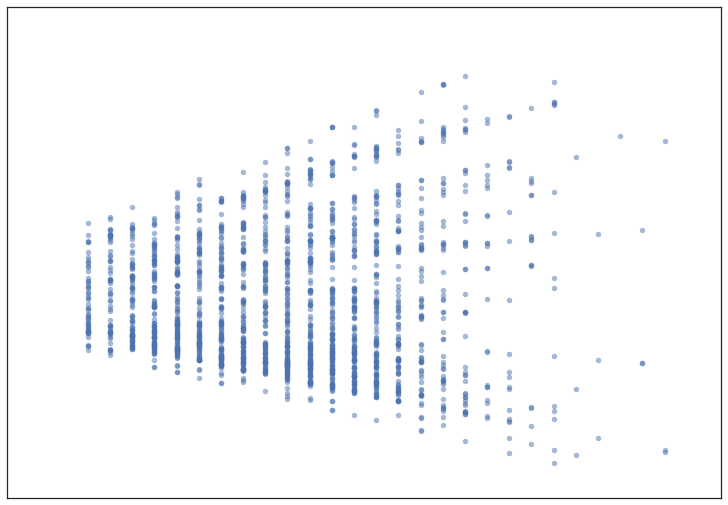

parameters : {'n_neighbors': 10, 'eigen_tol': 0.0, 'coef0': 1, 'gamma': 1.0, 'degree': 3, 'n_init': 10, 'affinity': 'nearest_neighbors', 'eigen_solver': None, 'n_jobs': 1, 'kernel_params': None, 'n_clusters': 2, 'random_state': None, 'assign_labels': 'kmeans'}
labels : [0 0 1 ..., 1 1 1]
n_clusters : 2
clusters : {0: 735, 1: 1265}


In [24]:
main.perform_spectral_clustering(no_clusters=2,affinity="nearest_neighbors")

## 2.3.1  Cluster indices over Spectral Clustering  result 

## 2.3.2 External Indices for Spectral Clustering result 

In [25]:
val_ext=extval.external_indices(main.class_labels,main.spectral_results['labels'])
print("\n\nExternal Indices",end='\n\n')
print("entropy:",val_ext.entropy())
print("precision_coefficient:",val_ext.precision_coefficient())
print("recall_coefficient:",val_ext.recall_coefficient())
print("f_measure:",val_ext.f_measure())
print("weighted_f_measure:",val_ext.weighted_f_measure())
print("purity:",val_ext.purity())
print("folkes_mallows_index:",val_ext.folkes_mallows_index())
print("rand_index:",val_ext.rand_index())
print("adjusted_rand_index:",val_ext. adjusted_rand_index())
print("adjusted_mutual_information:",val_ext.adjusted_mutual_information())
print("normalized_mutual_information:",val_ext.normalized_mutual_information())
print("homogeneity_score:",val_ext.homogeneity_score())
print("completness_score:",val_ext.completness_score())
print("v_measure_score:",val_ext.v_measure_score())
print("jaccard_co_eff:",val_ext.jaccard_co_eff())
print("gamma_statistics:",val_ext.hubert_T_index())
print("kulczynski_index:",val_ext. kulczynski_index())
print("mcnemar_index:",val_ext.mcnemar_index())
print("phi_index:",val_ext.phi_index())
print("rogers_tanimoto_index:",val_ext. rogers_tanimoto_index())
print("sokal_sneath_index1:",val_ext.sokal_sneath_index1())



External Indices

entropy: 0.721493323551
precision_coefficient: 0.6936566204493909
recall_coefficient: 0.5529832802102556
f_measure: 0.6153830197680931
weighted_f_measure: 0.6153830197680931
purity: 0.7925
folkes_mallows_index: 0.619338771042
rand_index: 0.5362181090545273
adjusted_rand_index: 0.0497727077801
adjusted_mutual_information: 0.0156292292347
normalized_mutual_information: 0.0181619062214
homogeneity_score: 0.0206108055668
completness_score: 0.0160039759982
v_measure_score: 0.0180175777922
jaccard_co_eff: 0.44444277988344744
gamma_statistics: 0.05182748822208147
kulczynski_index: 0.6233199503298232
mcnemar_index: 3.2982616470559796
phi_index: 5.534102203417148e-14
rogers_tanimoto_index: 0.36632377567410546
sokal_sneath_index1: 0.285712909905138


## 2.3.3 Internal Indices for Spectral Clustering result 

In [26]:
val_int=intval.internal_indices(main.data,main.spectral_results['labels'])

print("Internal Indices",end="\n\n")
print("ball-hall index : ",val_int.ball_hall_index())
print("Banfeld-Raftery index : ",val_int.banfeld_raftery_index())
print("Det Ratio Index : ",val_int.det_ratio_index())
print("Ksq-detw Index  :",val_int.ksq_detw_index())
print("Log-det Ratio Index : ",val_int.log_det_ratio_index())
print("Log SS Ratio Index : ",val_int.log_ss_ratio_index())
#print("Scott-Symons Index : ",val_int.scott_symons_index())(not working for this given dataset)
#print("Trace WiB Index : ",val_int.trace_wib_index())(not working for this given dataset)
print("Sillhoutte Index : ",val_int.silhouette_score())
print("Calinski-Harabasz index : ",val_int.calinski_harabaz_score())
print("C-index : ",val_int.c_index())
print("Dunn Index : ",val_int.dunn_index())
print("Davies Bouldin Index : ",val_int.davies_bouldin_index())
print("Ray-Turi Index : ",val_int.ray_turi_index())
print("Hartigan Index : ",val_int.hartigan_index())
print("PBM Index : ",val_int.pbm_index())

Internal Indices

ball-hall index :  28797870992.1
Banfeld-Raftery index :  47173.8911963
Det Ratio Index :  nan
Ksq-detw Index  : 0.0
Log-det Ratio Index :  nan
Log SS Ratio Index :  -1.2563239988345676
Sillhoutte Index :  0.228775567341
Calinski-Harabasz index :  568.827918461


/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:159: RuntimeWarning: invalid value encountered in double_scalars
  return self.det_T/self.det_WG
/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:165: RuntimeWarning: invalid value encountered in double_scalars
  return self.n_samples * log(self.det_T/self.det_WG)


C-index :  0.417695133031
Dunn Index :  0.001836354630620148
Davies Bouldin Index :  1.15148295341
Ray-Turi Index :  0.816455376797
Hartigan Index :  -1126.61536195
PBM Index :  16757185630.3


## 2.4 Spectral Clustering (Affinity = rbf)

Input array validated ...
Performing Spectral Embedding ...
Adjacency matrix checked for symetricity ...
Computing graph laplacian ...
Starting set Diagonal ...
Starting eigsh ...


/usr/local/lib/python3.5/dist-packages/sklearn/manifold/spectral_embedding_.py:231: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


[  4.44089210e-16   6.66133815e-16]
[[ -4.58798554e-19   2.94039824e-20]
 [ -7.85512499e-19   2.25671142e-20]
 [  4.07781308e-19  -3.18461030e-20]
 ..., 
 [  1.95654128e-19  -2.87151496e-20]
 [  4.10541872e-19  -1.67330795e-20]
 [  4.42936457e-19  -1.43015560e-20]]
Finished eigsh ...


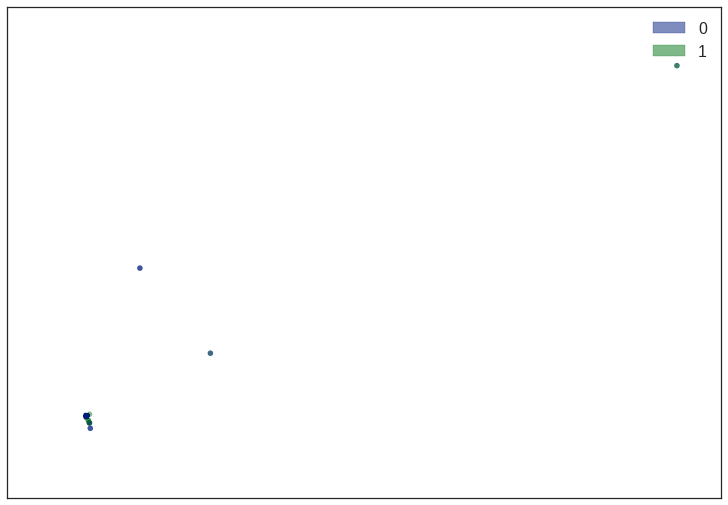

parameters : {'n_neighbors': 10, 'eigen_tol': 0.0, 'coef0': 1, 'gamma': 1.0, 'degree': 3, 'n_init': 10, 'affinity': 'rbf', 'eigen_solver': None, 'n_jobs': 1, 'kernel_params': None, 'n_clusters': 2, 'random_state': None, 'assign_labels': 'kmeans'}
labels : [0 0 0 ..., 0 0 0]
n_clusters : 2
clusters : {0: 1998, 1: 2}


In [27]:
main.perform_spectral_clustering(no_clusters=2,pass_labels=True)

## 2.4.1  Cluster indices over Spectral Clustering  result 

## 2.4.2 External Indices for Spectral Clustering result 

In [28]:
val_ext=extval.external_indices(main.class_labels,main.spectral_results['labels'])
print("\n\nExternal Indices",end='\n\n')
print("entropy:",val_ext.entropy())
print("precision_coefficient:",val_ext.precision_coefficient())
print("recall_coefficient:",val_ext.recall_coefficient())
print("f_measure:",val_ext.f_measure())
print("weighted_f_measure:",val_ext.weighted_f_measure())
print("purity:",val_ext.purity())
print("folkes_mallows_index:",val_ext.folkes_mallows_index())
print("rand_index:",val_ext.rand_index())
print("adjusted_rand_index:",val_ext. adjusted_rand_index())
print("adjusted_mutual_information:",val_ext.adjusted_mutual_information())
print("normalized_mutual_information:",val_ext.normalized_mutual_information())
print("homogeneity_score:",val_ext.homogeneity_score())
print("completness_score:",val_ext.completness_score())
print("v_measure_score:",val_ext.v_measure_score())
print("jaccard_co_eff:",val_ext.jaccard_co_eff())
print("gamma_statistics:",val_ext.hubert_T_index())
print("kulczynski_index:",val_ext. kulczynski_index())
print("mcnemar_index:",val_ext.mcnemar_index())
print("phi_index:",val_ext.phi_index())
print("rogers_tanimoto_index:",val_ext. rogers_tanimoto_index())
print("sokal_sneath_index1:",val_ext.sokal_sneath_index1())



External Indices

entropy: 0.736374283619
precision_coefficient: 0.6712903833776774
recall_coefficient: 0.9985103170608958
f_measure: 0.8028387739570635
weighted_f_measure: 0.8028387739570635
purity: 0.7925
folkes_mallows_index: 0.818712631847
rand_index: 0.6709479739869935
adjusted_rand_index: 0.00207272155725
adjusted_mutual_information: -0.000143212653649
normalized_mutual_information: 0.00330025975476
homogeneity_score: 0.000410685872973
completness_score: 0.0265207915969
v_measure_score: 0.000808846411125
jaccard_co_eff: 0.6706187575175188
gamma_statistics: 0.016282763124187874
kulczynski_index: 0.8349003502192867
mcnemar_index: -806.1062434955556
phi_index: 1.9415741365655102e-13
rogers_tanimoto_index: 0.50483198614862
sokal_sneath_index1: 0.5044593199353468


## 2.4.3 Internal Indices for Spectral Clustering result 

In [29]:
val_int=intval.internal_indices(main.data,main.spectral_results['labels'])

print("Internal Indices",end="\n\n")
print("ball-hall index : ",val_int.ball_hall_index())
print("Banfeld-Raftery index : ",val_int.banfeld_raftery_index())
print("Det Ratio Index : ",val_int.det_ratio_index())
print("Ksq-detw Index  :",val_int.ksq_detw_index())
print("Log-det Ratio Index : ",val_int.log_det_ratio_index())
print("Log SS Ratio Index : ",val_int.log_ss_ratio_index())
#print("Scott-Symons Index : ",val_int.scott_symons_index())(not working for this given dataset)
#print("Trace WiB Index : ",val_int.trace_wib_index())(not working for this given dataset)
print("Sillhoutte Index : ",val_int.silhouette_score())
print("Calinski-Harabasz index : ",val_int.calinski_harabaz_score())
print("C-index : ",val_int.c_index())
print("Dunn Index : ",val_int.dunn_index())
print("Davies Bouldin Index : ",val_int.davies_bouldin_index())
print("Ray-Turi Index : ",val_int.ray_turi_index())
print("Hartigan Index : ",val_int.hartigan_index())
print("PBM Index : ",val_int.pbm_index())

Internal Indices

ball-hall index :  23000412372.0
Banfeld-Raftery index :  -inf
Det Ratio Index :  nan
Ksq-detw Index  : 0.0
Log-det Ratio Index :  nan
Log SS Ratio Index :  -7.930161345427855
Sillhoutte Index :  -0.320083459273
Calinski-Harabasz index :  0.718737278706


/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:152: RuntimeWarning: divide by zero encountered in log
  br_index = np.sum(self.clusters_size*np.log(self.WGSS_clusters/self.clusters_size))
/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:159: RuntimeWarning: invalid value encountered in double_scalars
  return self.det_T/self.det_WG
/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:165: RuntimeWarning: invalid value encountered in double_scalars
  return self.n_samples * log(self.det_T/self.det_WG)


C-index :  0.865486936696
Dunn Index :  1.4905673944406651e-06
Davies Bouldin Index :  1.34938294218
Ray-Turi Index :  2.7770954132
Hartigan Index :  -879.220120783
PBM Index :  4141524854.04


## 2.5 Heirarchical Clustering 

In [30]:
main.perform_hierarchial(no_clusters=2)

Validated input array ...
Computing condensed distance matrix ...
Initialising Cython Code ...
Finsihed executing Cython code
parameters : {'pooling_func': <function mean at 0x7f17f4641bf8>, 'n_clusters': 2, 'memory': Memory(cachedir=None), 'compute_full_tree': 'auto', 'linkage': 'ward', 'affinity': 'euclidean', 'connectivity': None}
labels : [0 0 0 ..., 1 0 0]
n_clusters : 2
clusters : {0: 1593, 1: 407}


## 2.5.1  Cluster indices over Heirarchical Clustering   result

## 2.5.2 External Indices for Heirarchical Clustering  result 

In [31]:
val_ext=extval.external_indices(main.class_labels,main.hierarchial_results['labels'])
print("\n\nExternal Indices",end='\n\n')
print("entropy:",val_ext.entropy())
print("precision_coefficient:",val_ext.precision_coefficient())
print("recall_coefficient:",val_ext.recall_coefficient())
print("f_measure:",val_ext.f_measure())
print("weighted_f_measure:",val_ext.weighted_f_measure())
print("purity:",val_ext.purity())
print("folkes_mallows_index:",val_ext.folkes_mallows_index())
print("rand_index:",val_ext.rand_index())
print("adjusted_rand_index:",val_ext. adjusted_rand_index())
print("adjusted_mutual_information:",val_ext.adjusted_mutual_information())
print("normalized_mutual_information:",val_ext.normalized_mutual_information())
print("homogeneity_score:",val_ext.homogeneity_score())
print("completness_score:",val_ext.completness_score())
print("v_measure_score:",val_ext.v_measure_score())
print("jaccard_co_eff:",val_ext.jaccard_co_eff())
print("gamma_statistics:",val_ext.hubert_T_index())
print("kulczynski_index:",val_ext. kulczynski_index())
print("mcnemar_index:",val_ext.mcnemar_index())
print("phi_index:",val_ext.phi_index())
print("rogers_tanimoto_index:",val_ext. rogers_tanimoto_index())
print("sokal_sneath_index1:",val_ext.sokal_sneath_index1())



External Indices

entropy: 0.735000551698
precision_coefficient: 0.6632848356604861
recall_coefficient: 0.6679453484687505
f_measure: 0.66560693405412
weighted_f_measure: 0.66560693405412
purity: 0.7925
folkes_mallows_index: 0.665611013047
rand_index: 0.5497028514257128
adjusted_rand_index: -0.0235380878449
adjusted_mutual_information: 0.00178565588327
normalized_mutual_information: 0.00228760332816
homogeneity_score: 0.00227545461879
completness_score: 0.0022998168998
v_measure_score: 0.00228757089749
jaccard_co_eff: 0.49880874761763444
gamma_statistics: -0.023539439398176102
kulczynski_index: 0.6656150920646183
mcnemar_index: -310.4595121110902
phi_index: -2.6781214684671192e-14
rogers_tanimoto_index: 0.3790277406020536
sokal_sneath_index1: 0.332275282597093


## 2.5.3 Internal Indices for Heirarchical Clustering  result 

In [32]:
val_int=intval.internal_indices(main.data,main.hierarchial_results['labels'])

print("Internal Indices",end="\n\n")
print("ball-hall index : ",val_int.ball_hall_index())
print("Banfeld-Raftery index : ",val_int.banfeld_raftery_index())
print("Det Ratio Index : ",val_int.det_ratio_index())
print("Ksq-detw Index  :",val_int.ksq_detw_index())
print("Log-det Ratio Index : ",val_int.log_det_ratio_index())
print("Log SS Ratio Index : ",val_int.log_ss_ratio_index())
#print("Scott-Symons Index : ",val_int.scott_symons_index())#(not working for this given dataset)
#print("Trace WiB Index : ",val_int.trace_wib_index())(not working for this given dataset)
print("Sillhoutte Index : ",val_int.silhouette_score())
print("Calinski-Harabasz index : ",val_int.calinski_harabaz_score())
print("C-index : ",val_int.c_index())
print("Dunn Index : ",val_int.dunn_index())
print("Davies Bouldin Index : ",val_int.davies_bouldin_index())
print("Ray-Turi Index : ",val_int.ray_turi_index())
print("Hartigan Index : ",val_int.hartigan_index())
print("PBM Index : ",val_int.pbm_index())

Internal Indices

ball-hall index :  43945367367.2
Banfeld-Raftery index :  48035.5192526
Det Ratio Index :  nan
Ksq-detw Index  : 0.0
Log-det Ratio Index :  nan
Log SS Ratio Index :  -0.6868256551075962
Sillhoutte Index :  0.458065978462
Calinski-Harabasz index :  1005.33520692


/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:159: RuntimeWarning: invalid value encountered in double_scalars
  return self.det_T/self.det_WG
/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:165: RuntimeWarning: invalid value encountered in double_scalars
  return self.n_samples * log(self.det_T/self.det_WG)


C-index :  0.201148515637
Dunn Index :  0.006700000043648254
Davies Bouldin Index :  1.07008416955
Ray-Turi Index :  0.322132679998
Hartigan Index :  -1253.10227776
PBM Index :  35659817237.2


## 2.6 DBSCAN

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

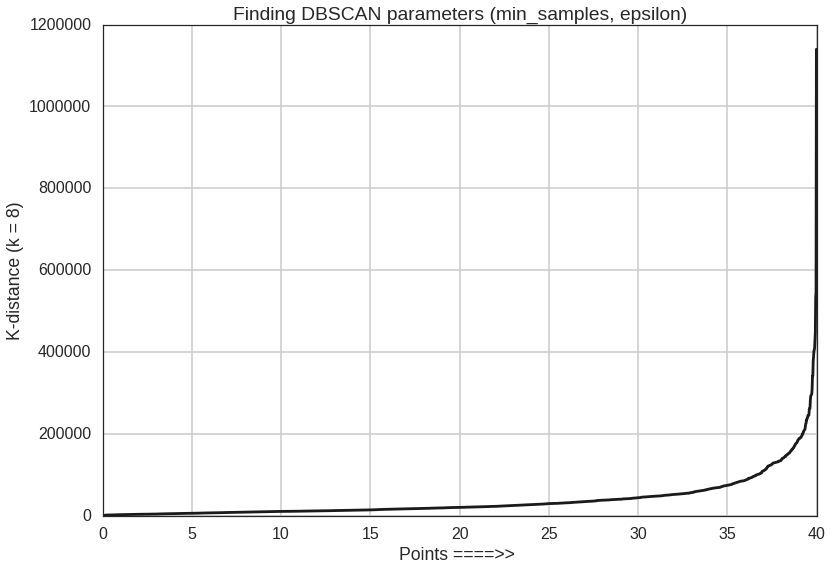

Enter estimated value of eps : 
70000


In [33]:
main.comp_distance_matrix()
main.det_dbscan_params(min_samples=8)

In [34]:
main.perform_dbscan()

Input Array validated ...
Initial Checks successful ...
Neighbors model fitted successfully ...
Neighbours list generation initialised ...

generating n_neighbours for each sample ...
generating initial labels for each sample ...
evaluating is core for each sample ...
Initialising dbscan CPython code ...
-- i =  0 --
i= 0  cnt =  0  stack size =  0
stack size  =  0
i= 0  cnt =  1  stack size =  0
i= 0  cnt =  2  stack size =  1
i= 0  cnt =  3  stack size =  2
i= 0  cnt =  4  stack size =  3
i= 0  cnt =  5  stack size =  4
i= 0  cnt =  6  stack size =  5
i= 0  cnt =  7  stack size =  6
i= 0  cnt =  8  stack size =  7
i= 0  cnt =  9  stack size =  8
i= 0  cnt =  10  stack size =  9
i= 0  cnt =  11  stack size =  10
i= 0  cnt =  12  stack size =  11
i= 0  cnt =  13  stack size =  12
i= 0  cnt =  14  stack size =  13
i= 0  cnt =  15  stack size =  14
i= 0  cnt =  16  stack size =  15
i= 0  cnt =  17  stack size =  16
i= 0  cnt =  18  stack size =  17
i= 0  cnt =  19  stack size =  18
i= 0 

i= 0  cnt =  411  stack size =  410
i= 0  cnt =  412  stack size =  411
i= 0  cnt =  413  stack size =  412
i= 0  cnt =  414  stack size =  413
i= 0  cnt =  415  stack size =  414
i= 0  cnt =  416  stack size =  415
i= 0  cnt =  417  stack size =  416
i= 0  cnt =  418  stack size =  417
i= 0  cnt =  419  stack size =  418
i= 0  cnt =  420  stack size =  419
i= 0  cnt =  421  stack size =  420
i= 0  cnt =  422  stack size =  421
i= 0  cnt =  423  stack size =  422
i= 0  cnt =  424  stack size =  423
i= 0  cnt =  425  stack size =  424
i= 0  cnt =  426  stack size =  425
i= 0  cnt =  427  stack size =  426
i= 0  cnt =  428  stack size =  427
i= 0  cnt =  429  stack size =  428
i= 0  cnt =  430  stack size =  429
i= 0  cnt =  431  stack size =  430
i= 0  cnt =  432  stack size =  431
i= 0  cnt =  433  stack size =  432
i= 0  cnt =  434  stack size =  433
i= 0  cnt =  435  stack size =  434
i= 0  cnt =  436  stack size =  435
i= 0  cnt =  437  stack size =  436
i= 0  cnt =  438  stack size

i= 0  cnt =  826  stack size =  816
i= 0  cnt =  827  stack size =  817
i= 0  cnt =  828  stack size =  818
i= 0  cnt =  829  stack size =  819
i= 0  cnt =  830  stack size =  820
i= 0  cnt =  831  stack size =  821
i= 0  cnt =  832  stack size =  822
i= 0  cnt =  833  stack size =  823
i= 0  cnt =  834  stack size =  824
i= 0  cnt =  835  stack size =  825
i= 0  cnt =  836  stack size =  826
i= 0  cnt =  837  stack size =  827
i= 0  cnt =  838  stack size =  828
i= 0  cnt =  839  stack size =  829
i= 0  cnt =  840  stack size =  830
i= 0  cnt =  841  stack size =  831
i= 0  cnt =  842  stack size =  832
i= 0  cnt =  843  stack size =  833
i= 0  cnt =  844  stack size =  834
i= 0  cnt =  845  stack size =  835
i= 0  cnt =  846  stack size =  836
i= 0  cnt =  847  stack size =  837
i= 0  cnt =  848  stack size =  838
i= 0  cnt =  849  stack size =  839
i= 0  cnt =  850  stack size =  840
i= 0  cnt =  851  stack size =  841
i= 0  cnt =  852  stack size =  842
i= 0  cnt =  853  stack size

i= 0  cnt =  1286  stack size =  1269
stack size  =  1269
i= 0  cnt =  1287  stack size =  1269
i= 0  cnt =  1288  stack size =  1270
i= 0  cnt =  1289  stack size =  1271
i= 0  cnt =  1290  stack size =  1272
stack size  =  1272
i= 0  cnt =  1291  stack size =  1272
i= 0  cnt =  1292  stack size =  1273
i= 0  cnt =  1293  stack size =  1274
stack size  =  1274
stack size  =  1273
stack size  =  1272
i= 0  cnt =  1294  stack size =  1272
i= 0  cnt =  1295  stack size =  1273
i= 0  cnt =  1296  stack size =  1274
i= 0  cnt =  1297  stack size =  1274
i= 0  cnt =  1298  stack size =  1274
stack size  =  1274
i= 0  cnt =  1299  stack size =  1274
i= 0  cnt =  1300  stack size =  1275
stack size  =  1274
i= 0  cnt =  1301  stack size =  1274
i= 0  cnt =  1302  stack size =  1274
i= 0  cnt =  1303  stack size =  1274
i= 0  cnt =  1304  stack size =  1274
i= 0  cnt =  1305  stack size =  1275
stack size  =  1275
i= 0  cnt =  1306  stack size =  1275
i= 0  cnt =  1307  stack size =  1276
i= 0

i= 0  cnt =  1705  stack size =  1607
i= 0  cnt =  1706  stack size =  1608
i= 0  cnt =  1707  stack size =  1609
i= 0  cnt =  1708  stack size =  1610
i= 0  cnt =  1709  stack size =  1611
i= 0  cnt =  1710  stack size =  1612
stack size  =  1612
i= 0  cnt =  1711  stack size =  1612
i= 0  cnt =  1712  stack size =  1612
i= 0  cnt =  1713  stack size =  1613
stack size  =  1613
i= 0  cnt =  1714  stack size =  1613
stack size  =  1612
stack size  =  1611
stack size  =  1610
stack size  =  1609
i= 0  cnt =  1715  stack size =  1609
stack size  =  1608
stack size  =  1607
stack size  =  1606
stack size  =  1605
stack size  =  1604
stack size  =  1603
stack size  =  1602
stack size  =  1601
stack size  =  1600
i= 0  cnt =  1716  stack size =  1600
stack size  =  1600
i= 0  cnt =  1717  stack size =  1600
stack size  =  1599
stack size  =  1598
stack size  =  1597
stack size  =  1596
stack size  =  1595
stack size  =  1594
stack size  =  1593
stack size  =  1592
stack size  =  1591
stack 

stack size  =  871
stack size  =  870
stack size  =  869
stack size  =  868
stack size  =  867
stack size  =  866
stack size  =  865
stack size  =  864
stack size  =  863
stack size  =  862
stack size  =  861
stack size  =  860
stack size  =  859
stack size  =  858
stack size  =  857
stack size  =  856
stack size  =  855
stack size  =  854
stack size  =  853
stack size  =  852
stack size  =  851
stack size  =  850
stack size  =  849
stack size  =  848
stack size  =  847
stack size  =  846
stack size  =  845
stack size  =  844
stack size  =  843
stack size  =  842
stack size  =  841
stack size  =  840
stack size  =  839
stack size  =  838
stack size  =  837
stack size  =  836
stack size  =  835
stack size  =  834
stack size  =  833
stack size  =  832
stack size  =  831
stack size  =  830
stack size  =  829
stack size  =  828
stack size  =  827
stack size  =  826
stack size  =  825
stack size  =  824
stack size  =  823
stack size  =  822
stack size  =  821
stack size  =  820
stack size  

-- i =  117 --
-- i =  118 --
-- i =  119 --
-- i =  120 --
-- i =  121 --
-- i =  122 --
-- i =  123 --
-- i =  124 --
-- i =  125 --
-- i =  126 --
-- i =  127 --
-- i =  128 --
-- i =  129 --
-- i =  130 --
-- i =  131 --
-- i =  132 --
-- i =  133 --
-- i =  134 --
-- i =  135 --
-- i =  136 --
-- i =  137 --
-- i =  138 --
-- i =  139 --
-- i =  140 --
-- i =  141 --
-- i =  142 --
-- i =  143 --
-- i =  144 --
-- i =  145 --
-- i =  146 --
-- i =  147 --
-- i =  148 --
-- i =  149 --
-- i =  150 --
-- i =  151 --
-- i =  152 --
-- i =  153 --
-- i =  154 --
-- i =  155 --
-- i =  156 --
-- i =  157 --
-- i =  158 --
-- i =  159 --
-- i =  160 --
-- i =  161 --
-- i =  162 --
-- i =  163 --
-- i =  164 --
-- i =  165 --
-- i =  166 --
-- i =  167 --
-- i =  168 --
-- i =  169 --
-- i =  170 --
-- i =  171 --
-- i =  172 --
-- i =  173 --
-- i =  174 --
-- i =  175 --
-- i =  176 --
-- i =  177 --
-- i =  178 --
-- i =  179 --
-- i =  180 --
-- i =  181 --
-- i =  182 --
-- i =  18

-- i =  917 --
-- i =  918 --
-- i =  919 --
-- i =  920 --
-- i =  921 --
-- i =  922 --
-- i =  923 --
-- i =  924 --
-- i =  925 --
-- i =  926 --
-- i =  927 --
-- i =  928 --
-- i =  929 --
-- i =  930 --
-- i =  931 --
-- i =  932 --
-- i =  933 --
-- i =  934 --
-- i =  935 --
-- i =  936 --
-- i =  937 --
-- i =  938 --
-- i =  939 --
-- i =  940 --
-- i =  941 --
-- i =  942 --
-- i =  943 --
-- i =  944 --
-- i =  945 --
-- i =  946 --
-- i =  947 --
-- i =  948 --
-- i =  949 --
-- i =  950 --
-- i =  951 --
-- i =  952 --
-- i =  953 --
-- i =  954 --
-- i =  955 --
-- i =  956 --
-- i =  957 --
-- i =  958 --
-- i =  959 --
-- i =  960 --
-- i =  961 --
-- i =  962 --
-- i =  963 --
-- i =  964 --
-- i =  965 --
-- i =  966 --
-- i =  967 --
-- i =  968 --
-- i =  969 --
-- i =  970 --
-- i =  971 --
-- i =  972 --
-- i =  973 --
-- i =  974 --
-- i =  975 --
-- i =  976 --
-- i =  977 --
-- i =  978 --
-- i =  979 --
-- i =  980 --
-- i =  981 --
-- i =  982 --
-- i =  98

-- i =  1808 --
-- i =  1809 --
-- i =  1810 --
-- i =  1811 --
-- i =  1812 --
-- i =  1813 --
-- i =  1814 --
-- i =  1815 --
-- i =  1816 --
-- i =  1817 --
-- i =  1818 --
-- i =  1819 --
-- i =  1820 --
-- i =  1821 --
-- i =  1822 --
-- i =  1823 --
-- i =  1824 --
-- i =  1825 --
-- i =  1826 --
-- i =  1827 --
-- i =  1828 --
-- i =  1829 --
-- i =  1830 --
-- i =  1831 --
-- i =  1832 --
-- i =  1833 --
-- i =  1834 --
-- i =  1835 --
-- i =  1836 --
-- i =  1837 --
-- i =  1838 --
-- i =  1839 --
-- i =  1840 --
-- i =  1841 --
-- i =  1842 --
-- i =  1843 --
-- i =  1844 --
-- i =  1845 --
-- i =  1846 --
-- i =  1847 --
-- i =  1848 --
-- i =  1849 --
-- i =  1850 --
-- i =  1851 --
-- i =  1852 --
-- i =  1853 --
-- i =  1854 --
-- i =  1855 --
-- i =  1856 --
-- i =  1857 --
-- i =  1858 --
-- i =  1859 --
-- i =  1860 --
-- i =  1861 --
-- i =  1862 --
-- i =  1863 --
-- i =  1864 --
-- i =  1865 --
-- i =  1866 --
-- i =  1867 --
-- i =  1868 --
-- i =  1869 --
-- i =  

## 2.6.1  Cluster indices over DBSCAN Clustering  result 

## 2.6.2 External Indices for DBSCAN Clustering result 

In [35]:
val_ext=extval.external_indices(main.class_labels,main.dbscan_results['labels'])
print("\n\nExternal Indices",end='\n\n')
print("entropy:",val_ext.entropy())
print("precision_coefficient:",val_ext.precision_coefficient())
print("recall_coefficient:",val_ext.recall_coefficient())
print("f_measure:",val_ext.f_measure())
print("weighted_f_measure:",val_ext.weighted_f_measure())
print("purity:",val_ext.purity())
print("folkes_mallows_index:",val_ext.folkes_mallows_index())
print("rand_index:",val_ext.rand_index())
print("adjusted_rand_index:",val_ext. adjusted_rand_index())
print("adjusted_mutual_information:",val_ext.adjusted_mutual_information())
print("normalized_mutual_information:",val_ext.normalized_mutual_information())
print("homogeneity_score:",val_ext.homogeneity_score())
print("completness_score:",val_ext.completness_score())
print("v_measure_score:",val_ext.v_measure_score())
print("jaccard_co_eff:",val_ext.jaccard_co_eff())
print("gamma_statistics:",val_ext.hubert_T_index())
print("kulczynski_index:",val_ext. kulczynski_index())
print("mcnemar_index:",val_ext.mcnemar_index())
print("phi_index:",val_ext.phi_index())
print("rogers_tanimoto_index:",val_ext. rogers_tanimoto_index())
print("sokal_sneath_index1:",val_ext.sokal_sneath_index1())



External Indices

entropy: 0.673618257697
precision_coefficient: 0.6642843519150216
recall_coefficient: 0.8101839736062182
f_measure: 0.7300157304480407
weighted_f_measure: 0.7300157304480407
purity: 0.7925
folkes_mallows_index: 0.733616068417
rand_index: 0.5979234617308654
adjusted_rand_index: -0.0278799828229
adjusted_mutual_information: 0.00200879893148
normalized_mutual_information: 0.00312213201228
homogeneity_score: 0.00249951770221
completness_score: 0.00389983567369
v_measure_score: 0.00304646664422
jaccard_co_eff: 0.5748226556424865
gamma_statistics: -0.0300973843989344
kulczynski_index: 0.7372341627606198
mcnemar_index: -543.2021158574755
phi_index: -4.157220805395944e-14
rogers_tanimoto_index: 0.4264556501808402
sokal_sneath_index1: 0.40333412393783397


## 2.6.3 Internal Indices for DBSCAN Clustering result 

In [36]:
val_int=intval.internal_indices(main.data,main.dbscan_results['labels'])

print("Internal Indices",end="\n\n")
print("ball-hall index : ",val_int.ball_hall_index())
print("Banfeld-Raftery index : ",val_int.banfeld_raftery_index())
print("Det Ratio Index : ",val_int.det_ratio_index())
print("Ksq-detw Index  :",val_int.ksq_detw_index())
print("Log-det Ratio Index : ",val_int.log_det_ratio_index())
print("Log SS Ratio Index : ",val_int.log_ss_ratio_index())
#print("Scott-Symons Index : ",val_int.scott_symons_index())(not working for this given dataset)
#print("Trace WiB Index : ",val_int.trace_wib_index())(not working for this given dataset)
print("Sillhoutte Index : ",val_int.silhouette_score())
print("Calinski-Harabasz index : ",val_int.calinski_harabaz_score())
print("C-index : ",val_int.c_index())
print("Dunn Index : ",val_int.dunn_index())
print("Davies Bouldin Index : ",val_int.davies_bouldin_index())
print("Ray-Turi Index : ",val_int.ray_turi_index())
print("Hartigan Index : ",val_int.hartigan_index())
print("PBM Index : ",val_int.pbm_index())

Internal Indices

ball-hall index :  81625926832.6
Banfeld-Raftery index :  48273.0852163
Det Ratio Index :  nan
Ksq-detw Index  : 0.0
Log-det Ratio Index :  nan
Log SS Ratio Index :  -1.407979684792509
Sillhoutte Index :  0.489953127309
Calinski-Harabasz index :  488.784782211


/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:159: RuntimeWarning: invalid value encountered in double_scalars
  return self.det_T/self.det_WG
/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:165: RuntimeWarning: invalid value encountered in double_scalars
  return self.n_samples * log(self.det_T/self.det_WG)


C-index :  0.195733614466
Dunn Index :  0.025370735534475886
Davies Bouldin Index :  1.50002351723
Ray-Turi Index :  0.371158040517
Hartigan Index :  -1098.59994354
PBM Index :  29449701261.4


## 3 Classification

## 3.1  import dependencied and  Bag

In [37]:
import SRC.Supervised as SUP

In [38]:
main = SUP.Classification()

In [39]:
import pickle 
X=pickle.load(open("DATASETS/UCI_credit_card_bags1.p","rb"))
X

{'data': array([[  3.00000000e+04,   3.30000000e+01,   3.19560000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  1.00000000e+05,   3.40000000e+01,   1.91380000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  8.00000000e+04,   3.10000000e+01,   7.83560000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        ..., 
        [  8.00000000e+04,   2.50000000e+01,   7.41800000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  2.50000000e+05,   3.60000000e+01,   2.50800000e+03, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  8.00000000e+04,   2.90000000e+01,   7.61210000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00]]),
 'target': array([0, 0, 0, ..., 0, 0, 0])}

In [40]:
main.load_data(X["data"],X["target"])

## 3.1.1 Splitting data into test and train using sklearn API
### (test:train = 60:40)

In [41]:
main.train_test_split()

## 3.2.1  Gaussian NB

In [42]:
main.perform_GaussianNB()

labels_test_data : [1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0
 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1

## 3.2.2 Decision Tree

In [43]:
main.perform_DecisionTreeClassifier()

labels_test_data : [0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0
 0 0 1

In [44]:
main.perform_random_forest_classifier()

labels_test_data : [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 1

In [45]:
main.perform_svm_SVC()

labels_test_data : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0

In [46]:
main.perform_QuadraticDiscriminantAnalysis()

labels_test_data : [0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0
 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1

/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


## Bag 2

In [47]:
import pickle 
X=pickle.load(open("DATASETS/UCI_credit_card_bags2.p","rb"))
X

{'data': array([[  1.00000000e+05,   3.50000000e+01,   3.51500000e+03, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  3.00000000e+04,   2.20000000e+01,   8.06600000e+03, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  5.00000000e+04,   3.40000000e+01,   4.64130000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        ..., 
        [  2.30000000e+05,   5.90000000e+01,   2.08459000e+05, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  1.50000000e+05,   2.90000000e+01,   1.49278000e+05, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  5.00000000e+04,   3.40000000e+01,   5.07130000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00]]),
 'target': array([0, 0, 0, ..., 1, 0, 0])}

## 1.2 Picking Bag 1 

In [48]:
del main
main = EDA.EDA(False)
main.load_data(X["data"],X["target"])

In [49]:
main.class_labels.shape

(2000,)

## 2 Clustering 

### dependencies for Indices

In [50]:
import SRC.internal_indices as intval
import SRC.external_indices as extval

## 2.1 Kmeans 

In [51]:
main.perform_kmeans(no_clusters=2)

parameters : {'algorithm': 'auto', 'copy_x': True, 'verbose': 0, 'n_jobs': -1, 'random_state': None, 'init': 'k-means++', 'n_init': 10, 'max_iter': 300, 'precompute_distances': 'auto', 'n_clusters': 2, 'tol': 0.0001}
cluster_centers : [[  1.44540163e+05   3.50087311e+01   2.97919366e+04   2.83601211e+04
    2.70272346e+04   2.47549889e+04   2.28655693e+04   2.23304237e+04
    4.49446508e+03   4.44049651e+03   3.82880617e+03   3.56152503e+03
    3.56546217e+03   4.03625320e+03   3.95227008e-01   6.04772992e-01
    1.16414435e-03   3.63213038e-01   4.65075669e-01   1.55995343e-01
    5.23864959e-03   6.98486612e-03   2.32828871e-03   5.82072177e-04
    4.46449360e-01   5.38416764e-01   1.45518044e-02   1.04772992e-01
    2.14202561e-01   4.33643772e-01   1.33294529e-01   9.25494761e-02
    1.68800931e-02   2.32828871e-03   5.82072177e-04   5.82072177e-04
    0.00000000e+00   1.16414435e-03   1.46682189e-01   2.29336438e-01
    4.67986030e-01   1.16414435e-03   1.38533178e-01   9.31315483

## 2.1.1  Cluster indices over Kmeans  result 

## 2.1.2 External Indices for Kmeans result 

In [52]:
val_ext=extval.external_indices(main.class_labels,main.kmeans_results['labels'])
print("\n\nExternal Indices",end='\n\n')
print("entropy:",val_ext.entropy())
print("precision_coefficient:",val_ext.precision_coefficient())
print("recall_coefficient:",val_ext.recall_coefficient())
print("f_measure:",val_ext.f_measure())
print("weighted_f_measure:",val_ext.weighted_f_measure())
print("purity:",val_ext.purity())
print("folkes_mallows_index:",val_ext.folkes_mallows_index())
print("rand_index:",val_ext.rand_index())
print("adjusted_rand_index:",val_ext. adjusted_rand_index())
print("adjusted_mutual_information:",val_ext.adjusted_mutual_information())
print("normalized_mutual_information:",val_ext.normalized_mutual_information())
print("homogeneity_score:",val_ext.homogeneity_score())
print("completness_score:",val_ext.completness_score())
print("v_measure_score:",val_ext.v_measure_score())
print("jaccard_co_eff:",val_ext.jaccard_co_eff())
print("gamma_statistics:",val_ext.hubert_T_index())
print("kulczynski_index:",val_ext. kulczynski_index())
print("mcnemar_index:",val_ext.mcnemar_index())
print("phi_index:",val_ext.phi_index())
print("rogers_tanimoto_index:",val_ext. rogers_tanimoto_index())
print("sokal_sneath_index1:",val_ext.sokal_sneath_index1())



External Indices

entropy: 0.783781952722
precision_coefficient: 0.6299952988529729
recall_coefficient: 0.7460997887931338
f_measure: 0.6831495347009789
weighted_f_measure: 0.6831495347009789
purity: 0.7645
folkes_mallows_index: 0.685594165243
rand_index: 0.5572391195597799
adjusted_rand_index: -0.0345016881245
adjusted_mutual_information: 0.00423429653995
normalized_mutual_information: 0.00543474322134
homogeneity_score: 0.00469163724743
completness_score: 0.00629554936246
v_measure_score: 0.00537652356889
jaccard_co_eff: 0.5187753300036646
gamma_statistics: -0.03589031669471397
kulczynski_index: 0.6880475438230533
mcnemar_index: -472.06304235587163
phi_index: -4.365968567975851e-14
rogers_tanimoto_index: 0.3862310983853078
sokal_sneath_index1: 0.35023406003962115


## 2.1.3 Internal Indices for Kmeans result 

In [53]:
val_int=intval.internal_indices(main.data,main.kmeans_results['labels'])

print("Internal Indices",end="\n\n")
print("ball-hall index : ",val_int.ball_hall_index())
print("Banfeld-Raftery index : ",val_int.banfeld_raftery_index())
print("Det Ratio Index : ",val_int.det_ratio_index())
print("Ksq-detw Index  :",val_int.ksq_detw_index())
print("Log-det Ratio Index : ",val_int.log_det_ratio_index())
print("Log SS Ratio Index : ",val_int.log_ss_ratio_index())
#print("Scott-Symons Index : ",val_int.scott_symons_index())(not working for this given dataset)
#print("Trace WiB Index : ",val_int.trace_wib_index())(not working for this given dataset)
print("Sillhoutte Index : ",val_int.silhouette_score())
print("Calinski-Harabasz index : ",val_int.calinski_harabaz_score())
print("C-index : ",val_int.c_index())
print("Dunn Index : ",val_int.dunn_index())
print("Davies Bouldin Index : ",val_int.davies_bouldin_index())
print("Ray-Turi Index : ",val_int.ray_turi_index())
print("Hartigan Index : ",val_int.hartigan_index())
print("PBM Index : ",val_int.pbm_index())

Internal Indices

ball-hall index :  45979128208.5
Banfeld-Raftery index :  47743.6604074
Det Ratio Index :  nan
Ksq-detw Index  : 0.0
Log-det Ratio Index :  nan
Log SS Ratio Index :  -0.42012203897039574
Sillhoutte Index :  0.550393814982
Calinski-Harabasz index :  1312.6193455


/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:159: RuntimeWarning: invalid value encountered in double_scalars
  return self.det_T/self.det_WG
/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:165: RuntimeWarning: invalid value encountered in double_scalars
  return self.n_samples * log(self.det_T/self.det_WG)


C-index :  0.107089124044
Dunn Index :  0.010942388769672493
Davies Bouldin Index :  0.908972865269
Ray-Turi Index :  0.184360959504
Hartigan Index :  -1329.84635928
PBM Index :  56145653195.5


## 2.2 HDBSCAN

In [54]:
main.perform_hdbscan()

probabilities : [ 0.          1.          0.71264138 ...,  0.          0.          0.        ]
parameters : {'cluster_selection_method': 'eom', 'p': None, 'prediction_data': False, 'metric': 'euclidean', 'leaf_size': 40, 'match_reference_implementation': False, 'algorithm': 'best', 'allow_single_cluster': False, 'min_samples': None, 'memory': Memory(cachedir=None), 'core_dist_n_jobs': 4, 'min_cluster_size': 15, 'alpha': 1.0, 'approx_min_span_tree': True, 'gen_min_span_tree': False}
labels : [-1  2  2 ..., -1 -1 -1]
n_clusters : 4
clusters : {0: 19, 1: 19, 2: 770, 3: 29, -1: 1163}


## 2.2.1  Cluster indices over HDBSCAN  result 

## 2.2.2 External Indices for HDBSCAN result 

In [55]:
val_ext=extval.external_indices(main.class_labels,main.hdbscan_results['labels'])
print("\n\nExternal Indices",end='\n\n')
print("entropy:",val_ext.entropy())
print("precision_coefficient:",val_ext.precision_coefficient())
print("recall_coefficient:",val_ext.recall_coefficient())
print("f_measure:",val_ext.f_measure())
print("weighted_f_measure:",val_ext.weighted_f_measure())
print("purity:",val_ext.purity())
print("folkes_mallows_index:",val_ext.folkes_mallows_index())
print("rand_index:",val_ext.rand_index())
print("adjusted_rand_index:",val_ext. adjusted_rand_index())
print("adjusted_mutual_information:",val_ext.adjusted_mutual_information())
print("normalized_mutual_information:",val_ext.normalized_mutual_information())
print("homogeneity_score:",val_ext.homogeneity_score())
print("completness_score:",val_ext.completness_score())
print("v_measure_score:",val_ext.v_measure_score())
print("jaccard_co_eff:",val_ext.jaccard_co_eff())
print("gamma_statistics:",val_ext.hubert_T_index())
print("kulczynski_index:",val_ext. kulczynski_index())
print("mcnemar_index:",val_ext.mcnemar_index())
print("phi_index:",val_ext.phi_index())
print("rogers_tanimoto_index:",val_ext. rogers_tanimoto_index())
print("sokal_sneath_index1:",val_ext.sokal_sneath_index1())



External Indices

entropy: 0.381344989079
precision_coefficient: 0.6692383467212879
recall_coefficient: 0.5089334796116171
f_measure: 0.5781801819969024
weighted_f_measure: 0.5781801819969024
purity: 0.7645
folkes_mallows_index: 0.583607574048
rand_index: 0.5249289644822411
adjusted_rand_index: 0.0569733301213
adjusted_mutual_information: 0.0201271369648
normalized_mutual_information: 0.0263613355358
homogeneity_score: 0.0325578075735
completness_score: 0.0213441893979
v_measure_score: 0.0257845738665
jaccard_co_eff: 0.40664799764075493
gamma_statistics: 0.05980738768642319
kulczynski_index: 0.5890859131664525
mcnemar_index: 90.51970835128792
phi_index: 6.237461695996367e-14
rogers_tanimoto_index: 0.35586690528296344
sokal_sneath_index1: 0.25521541821181964


## 2.2.3 Internal Indices for HDBSCAN result 

In [56]:
val_int=intval.internal_indices(main.data,main.hdbscan_results['labels'])

print("Internal Indices",end="\n\n")
print("ball-hall index : ",val_int.ball_hall_index())
print("Banfeld-Raftery index : ",val_int.banfeld_raftery_index())
print("Det Ratio Index : ",val_int.det_ratio_index())
print("Ksq-detw Index  :",val_int.ksq_detw_index())
print("Log-det Ratio Index : ",val_int.log_det_ratio_index())
print("Log SS Ratio Index : ",val_int.log_ss_ratio_index())
#print("Scott-Symons Index : ",val_int.scott_symons_index())(not working for this given dataset)
#print("Trace WiB Index : ",val_int.trace_wib_index())(not working for this given dataset)
print("Sillhoutte Index : ",val_int.silhouette_score())
print("Calinski-Harabasz index : ",val_int.calinski_harabaz_score())
print("C-index : ",val_int.c_index())
print("Dunn Index : ",val_int.dunn_index())
print("Davies Bouldin Index : ",val_int.davies_bouldin_index())
print("Ray-Turi Index : ",val_int.ray_turi_index())
print("Hartigan Index : ",val_int.hartigan_index())
print("PBM Index : ",val_int.pbm_index())

Internal Indices

ball-hall index :  13041975581.7
Banfeld-Raftery index :  47698.6110465
Det Ratio Index :  nan
Ksq-detw Index  : 0.0
Log-det Ratio Index :  nan
Log SS Ratio Index :  -1.4010216592403864
Sillhoutte Index :  -0.119650886214
Calinski-Harabasz index :  122.864645821


/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:159: RuntimeWarning: invalid value encountered in double_scalars
  return self.det_T/self.det_WG
/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:165: RuntimeWarning: invalid value encountered in double_scalars
  return self.n_samples * log(self.det_T/self.det_WG)


C-index :  0.442522563415
Dunn Index :  0.0012685456295104549
Davies Bouldin Index :  1.37368646682
Ray-Turi Index :  2.82917040987
Hartigan Index :  -1102.08257228
PBM Index :  11035957105.1


## 2.3 Spectral Clustering (Affinity = nearest neighbors)

Input array validated ...
Computing affinity matrix ...
Performing Spectral Embedding ...
Adjacency matrix checked for symetricity ...
Computing graph laplacian ...
Starting set Diagonal ...
Starting eigsh ...
[ -3.54655752e-03   3.55271368e-15]
[[ 0.00632752 -0.01900292]
 [ 0.05076394 -0.02687419]
 [ 0.01138468 -0.02687419]
 ..., 
 [-0.030612   -0.02738613]
 [-0.02280084 -0.02472066]
 [ 0.014809   -0.02108185]]
Finished eigsh ...


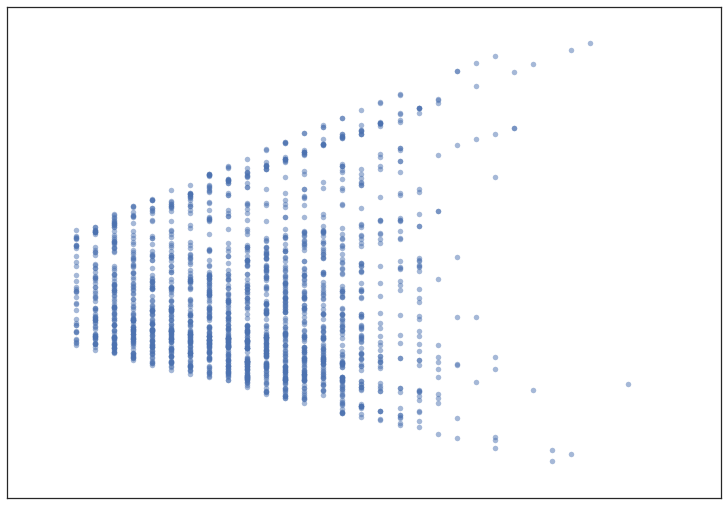

parameters : {'n_neighbors': 10, 'eigen_tol': 0.0, 'coef0': 1, 'gamma': 1.0, 'degree': 3, 'n_init': 10, 'affinity': 'nearest_neighbors', 'eigen_solver': None, 'n_jobs': 1, 'kernel_params': None, 'n_clusters': 2, 'random_state': None, 'assign_labels': 'kmeans'}
labels : [1 0 0 ..., 1 1 0]
n_clusters : 2
clusters : {0: 606, 1: 1394}


In [57]:
main.perform_spectral_clustering(no_clusters=2,affinity="nearest_neighbors")

## 2.3.1  Cluster indices over Spectral Clustering  result 

## 2.3.2 External Indices for Spectral Clustering result 

In [58]:
val_ext=extval.external_indices(main.class_labels,main.spectral_results['labels'])
print("\n\nExternal Indices",end='\n\n')
print("entropy:",val_ext.entropy())
print("precision_coefficient:",val_ext.precision_coefficient())
print("recall_coefficient:",val_ext.recall_coefficient())
print("f_measure:",val_ext.f_measure())
print("weighted_f_measure:",val_ext.weighted_f_measure())
print("purity:",val_ext.purity())
print("folkes_mallows_index:",val_ext.folkes_mallows_index())
print("rand_index:",val_ext.rand_index())
print("adjusted_rand_index:",val_ext. adjusted_rand_index())
print("adjusted_mutual_information:",val_ext.adjusted_mutual_information())
print("normalized_mutual_information:",val_ext.normalized_mutual_information())
print("homogeneity_score:",val_ext.homogeneity_score())
print("completness_score:",val_ext.completness_score())
print("v_measure_score:",val_ext.v_measure_score())
print("jaccard_co_eff:",val_ext.jaccard_co_eff())
print("gamma_statistics:",val_ext.hubert_T_index())
print("kulczynski_index:",val_ext. kulczynski_index())
print("mcnemar_index:",val_ext.mcnemar_index())
print("phi_index:",val_ext.phi_index())
print("rogers_tanimoto_index:",val_ext. rogers_tanimoto_index())
print("sokal_sneath_index1:",val_ext.sokal_sneath_index1())



External Indices

entropy: 0.768121979785
precision_coefficient: 0.6705725692146147
recall_coefficient: 0.6052347398933878
f_measure: 0.6362305837423148
weighted_f_measure: 0.6362305837423148
purity: 0.7645
folkes_mallows_index: 0.637066569919
rand_index: 0.5572391195597799
adjusted_rand_index: 0.0744313207565
adjusted_mutual_information: 0.0214719303392
normalized_mutual_information: 0.0231851539068
homogeneity_score: 0.0245779104271
completness_score: 0.0218713207242
v_measure_score: 0.0231457592885
jaccard_co_eff: 0.4665235751423381
gamma_statistics: 0.07507138560191799
kulczynski_index: 0.6379036545540013
mcnemar_index: -47.50643792626856
phi_index: 7.92203857914511e-14
rogers_tanimoto_index: 0.3862310983853078
sokal_sneath_index1: 0.30422611497639496


## 2.3.3 Internal Indices for Spectral Clustering result 

In [59]:
val_int=intval.internal_indices(main.data,main.spectral_results['labels'])

print("Internal Indices",end="\n\n")
print("ball-hall index : ",val_int.ball_hall_index())
print("Banfeld-Raftery index : ",val_int.banfeld_raftery_index())
print("Det Ratio Index : ",val_int.det_ratio_index())
print("Ksq-detw Index  :",val_int.ksq_detw_index())
print("Log-det Ratio Index : ",val_int.log_det_ratio_index())
print("Log SS Ratio Index : ",val_int.log_ss_ratio_index())
#print("Scott-Symons Index : ",val_int.scott_symons_index())(not working for this given dataset)
#print("Trace WiB Index : ",val_int.trace_wib_index())(not working for this given dataset)
print("Sillhoutte Index : ",val_int.silhouette_score())
print("Calinski-Harabasz index : ",val_int.calinski_harabaz_score())
print("C-index : ",val_int.c_index())
print("Dunn Index : ",val_int.dunn_index())
print("Davies Bouldin Index : ",val_int.davies_bouldin_index())
print("Ray-Turi Index : ",val_int.ray_turi_index())
print("Hartigan Index : ",val_int.hartigan_index())
print("PBM Index : ",val_int.pbm_index())

Internal Indices

ball-hall index :  26423778194.3
Banfeld-Raftery index :  47327.9098574
Det Ratio Index :  nan
Ksq-detw Index  : 0.0
Log-det Ratio Index :  nan
Log SS Ratio Index :  -1.4547789616185425
Sillhoutte Index :  0.165016052042
Calinski-Harabasz index :  466.437016164


/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:159: RuntimeWarning: invalid value encountered in double_scalars
  return self.det_T/self.det_WG
/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:165: RuntimeWarning: invalid value encountered in double_scalars
  return self.n_samples * log(self.det_T/self.det_WG)


C-index :  0.477467557829
Dunn Index :  0.0023533051633190583
Davies Bouldin Index :  1.14574915749
Ray-Turi Index :  0.904644364357
Hartigan Index :  -1100.77431645
PBM Index :  14285767732.2


## 2.4 Spectral Clustering (Affinity = rbf)

Input array validated ...
Performing Spectral Embedding ...
Adjacency matrix checked for symetricity ...
Computing graph laplacian ...
Starting set Diagonal ...


/usr/local/lib/python3.5/dist-packages/sklearn/manifold/spectral_embedding_.py:231: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Starting eigsh ...
[ -2.22044605e-16   0.00000000e+00]
[[ -5.38889549e-19  -7.34597373e-19]
 [  3.52625778e-19   1.08932965e-19]
 [  2.24827810e-19   3.71755727e-19]
 ..., 
 [ -4.98529886e-21  -1.53844775e-19]
 [ -2.22206408e-18  -1.41806439e-18]
 [  7.86292459e-20   8.98405226e-20]]
Finished eigsh ...


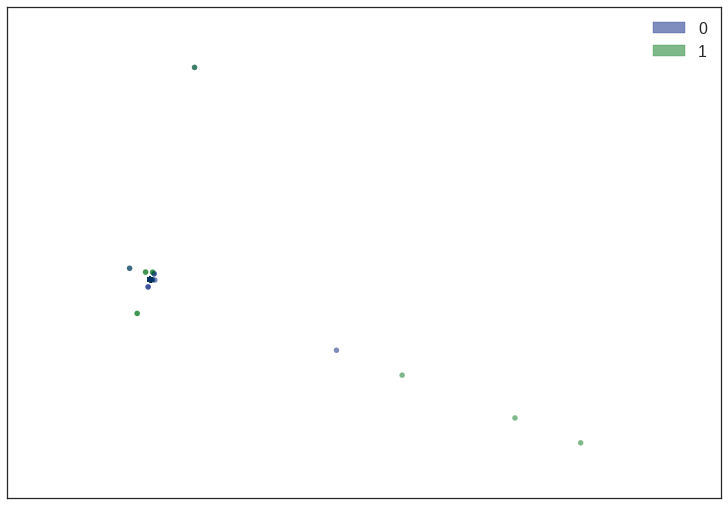

parameters : {'n_neighbors': 10, 'eigen_tol': 0.0, 'coef0': 1, 'gamma': 1.0, 'degree': 3, 'n_init': 10, 'affinity': 'rbf', 'eigen_solver': None, 'n_jobs': 1, 'kernel_params': None, 'n_clusters': 2, 'random_state': None, 'assign_labels': 'kmeans'}
labels : [0 0 0 ..., 0 0 0]
n_clusters : 2
clusters : {0: 1996, 1: 4}


In [60]:
main.perform_spectral_clustering(no_clusters=2,pass_labels=True)

## 2.4.1  Cluster indices over Spectral Clustering  result 

## 2.4.2 External Indices for Spectral Clustering result 

In [61]:
val_ext=extval.external_indices(main.class_labels,main.spectral_results['labels'])
print("\n\nExternal Indices",end='\n\n')
print("entropy:",val_ext.entropy())
print("precision_coefficient:",val_ext.precision_coefficient())
print("recall_coefficient:",val_ext.recall_coefficient())
print("f_measure:",val_ext.f_measure())
print("weighted_f_measure:",val_ext.weighted_f_measure())
print("purity:",val_ext.purity())
print("folkes_mallows_index:",val_ext.folkes_mallows_index())
print("rand_index:",val_ext.rand_index())
print("adjusted_rand_index:",val_ext. adjusted_rand_index())
print("adjusted_mutual_information:",val_ext.adjusted_mutual_information())
print("normalized_mutual_information:",val_ext.normalized_mutual_information())
print("homogeneity_score:",val_ext.homogeneity_score())
print("completness_score:",val_ext.completness_score())
print("v_measure_score:",val_ext.v_measure_score())
print("jaccard_co_eff:",val_ext.jaccard_co_eff())
print("gamma_statistics:",val_ext.hubert_T_index())
print("kulczynski_index:",val_ext. kulczynski_index())
print("mcnemar_index:",val_ext.mcnemar_index())
print("phi_index:",val_ext.phi_index())
print("rogers_tanimoto_index:",val_ext. rogers_tanimoto_index())
print("sokal_sneath_index1:",val_ext.sokal_sneath_index1())



External Indices

entropy: 0.785771800574
precision_coefficient: 0.6408331223857568
recall_coefficient: 0.9977072990309194
f_measure: 0.7804066049371579
weighted_f_measure: 0.7804066049371579
purity: 0.7655
folkes_mallows_index: 0.799602328451
rand_index: 0.6408009004502251
adjusted_rand_index: 0.00602357726007
adjusted_mutual_information: 0.00160897758517
normalized_mutual_information: 0.0133153391717
homogeneity_score: 0.0021647709417
completness_score: 0.0819016247129
v_measure_score: 0.00421805302526
jaccard_co_eff: 0.6398908095898188
gamma_statistics: 0.03594505254524645
kulczynski_index: 0.819270210708338
mcnemar_index: -836.7154602936035
phi_index: 2.9707698772754127e-13
rogers_tanimoto_index: 0.4714547711681724
sokal_sneath_index1: 0.4704701755576262


## 2.4.3 Internal Indices for Spectral Clustering result 

In [62]:
val_int=intval.internal_indices(main.data,main.spectral_results['labels'])

print("Internal Indices",end="\n\n")
print("ball-hall index : ",val_int.ball_hall_index())
print("Banfeld-Raftery index : ",val_int.banfeld_raftery_index())
print("Det Ratio Index : ",val_int.det_ratio_index())
print("Ksq-detw Index  :",val_int.ksq_detw_index())
print("Log-det Ratio Index : ",val_int.log_det_ratio_index())
print("Log SS Ratio Index : ",val_int.log_ss_ratio_index())
#print("Scott-Symons Index : ",val_int.scott_symons_index())(not working for this given dataset)
#print("Trace WiB Index : ",val_int.trace_wib_index())(not working for this given dataset)
print("Sillhoutte Index : ",val_int.silhouette_score())
print("Calinski-Harabasz index : ",val_int.calinski_harabaz_score())
print("C-index : ",val_int.c_index())
print("Dunn Index : ",val_int.dunn_index())
print("Davies Bouldin Index : ",val_int.davies_bouldin_index())
print("Ray-Turi Index : ",val_int.ray_turi_index())
print("Hartigan Index : ",val_int.hartigan_index())
print("PBM Index : ",val_int.pbm_index())

Internal Indices

ball-hall index :  22273588618.6
Banfeld-Raftery index :  48943.7884589
Det Ratio Index :  nan
Ksq-detw Index  : 0.0
Log-det Ratio Index :  nan
Log SS Ratio Index :  -7.278190431027336
Sillhoutte Index :  -0.222784339566
Calinski-Harabasz index :  1.37948677549


/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:159: RuntimeWarning: invalid value encountered in double_scalars
  return self.det_T/self.det_WG
/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:165: RuntimeWarning: invalid value encountered in double_scalars
  return self.n_samples * log(self.det_T/self.det_WG)


C-index :  0.850250778388
Dunn Index :  1.1814625835203304e-05
Davies Bouldin Index :  1.38488543621
Ray-Turi Index :  2.89093601392
Hartigan Index :  -892.311388367
PBM Index :  3854496831.68


## 2.5 Heirarchical Clustering 

In [63]:
main.perform_hierarchial(no_clusters=2)

Validated input array ...
Computing condensed distance matrix ...
Initialising Cython Code ...
Finsihed executing Cython code
parameters : {'pooling_func': <function mean at 0x7f17f4641bf8>, 'n_clusters': 2, 'memory': Memory(cachedir=None), 'compute_full_tree': 'auto', 'linkage': 'ward', 'affinity': 'euclidean', 'connectivity': None}
labels : [0 0 0 ..., 1 0 0]
n_clusters : 2
clusters : {0: 1853, 1: 147}


## 2.5.1  Cluster indices over Heirarchical Clustering   result

## 2.5.2 External Indices for Heirarchical Clustering  result 

In [64]:
val_ext=extval.external_indices(main.class_labels,main.hierarchial_results['labels'])
print("\n\nExternal Indices",end='\n\n')
print("entropy:",val_ext.entropy())
print("precision_coefficient:",val_ext.precision_coefficient())
print("recall_coefficient:",val_ext.recall_coefficient())
print("f_measure:",val_ext.f_measure())
print("weighted_f_measure:",val_ext.weighted_f_measure())
print("purity:",val_ext.purity())
print("folkes_mallows_index:",val_ext.folkes_mallows_index())
print("rand_index:",val_ext.rand_index())
print("adjusted_rand_index:",val_ext. adjusted_rand_index())
print("adjusted_mutual_information:",val_ext.adjusted_mutual_information())
print("normalized_mutual_information:",val_ext.normalized_mutual_information())
print("homogeneity_score:",val_ext.homogeneity_score())
print("completness_score:",val_ext.completness_score())
print("v_measure_score:",val_ext.v_measure_score())
print("jaccard_co_eff:",val_ext.jaccard_co_eff())
print("gamma_statistics:",val_ext.hubert_T_index())
print("kulczynski_index:",val_ext. kulczynski_index())
print("mcnemar_index:",val_ext.mcnemar_index())
print("phi_index:",val_ext.phi_index())
print("rogers_tanimoto_index:",val_ext. rogers_tanimoto_index())
print("sokal_sneath_index1:",val_ext.sokal_sneath_index1())



External Indices

entropy: 0.786577098374
precision_coefficient: 0.6357971028762157
recall_coefficient: 0.8584124218726175
f_measure: 0.7305215525129348
weighted_f_measure: 0.7305215525129348
purity: 0.7645
folkes_mallows_index: 0.738766628171
rand_index: 0.5948454227113557
adjusted_rand_index: -0.0171005692596
adjusted_mutual_information: 0.000682014550021
normalized_mutual_information: 0.00164665945459
homogeneity_score: 0.00114214005241
completness_score: 0.00237404104136
v_measure_score: 0.00154229107494
jaccard_co_eff: 0.5754501417168629
gamma_statistics: -0.020679839490549683
kulczynski_index: 0.7471047623744166
mcnemar_index: -633.3952119325907
phi_index: -3.1421818406053985e-14
rogers_tanimoto_index: 0.4233309504347603
sokal_sneath_index1: 0.40395226490029185


## 2.5.3 Internal Indices for Heirarchical Clustering  result 

In [65]:
val_int=intval.internal_indices(main.data,main.hierarchial_results['labels'])

print("Internal Indices",end="\n\n")
print("ball-hall index : ",val_int.ball_hall_index())
print("Banfeld-Raftery index : ",val_int.banfeld_raftery_index())
print("Det Ratio Index : ",val_int.det_ratio_index())
print("Ksq-detw Index  :",val_int.ksq_detw_index())
print("Log-det Ratio Index : ",val_int.log_det_ratio_index())
print("Log SS Ratio Index : ",val_int.log_ss_ratio_index())
#print("Scott-Symons Index : ",val_int.scott_symons_index())#(not working for this given dataset)
#print("Trace WiB Index : ",val_int.trace_wib_index())(not working for this given dataset)
print("Sillhoutte Index : ",val_int.silhouette_score())
print("Calinski-Harabasz index : ",val_int.calinski_harabaz_score())
print("C-index : ",val_int.c_index())
print("Dunn Index : ",val_int.dunn_index())
print("Davies Bouldin Index : ",val_int.davies_bouldin_index())
print("Ray-Turi Index : ",val_int.ray_turi_index())
print("Hartigan Index : ",val_int.hartigan_index())
print("PBM Index : ",val_int.pbm_index())

Internal Indices

ball-hall index :  50847338982.6
Banfeld-Raftery index :  48030.3034561
Det Ratio Index :  nan
Ksq-detw Index  : 0.0
Log-det Ratio Index :  nan
Log SS Ratio Index :  -0.5857493167554885
Sillhoutte Index :  0.602995489978
Calinski-Harabasz index :  1112.2637617


/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:159: RuntimeWarning: invalid value encountered in double_scalars
  return self.det_T/self.det_WG
/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:165: RuntimeWarning: invalid value encountered in double_scalars
  return self.n_samples * log(self.det_T/self.det_WG)


C-index :  0.097677156483
Dunn Index :  0.02028171211226484
Davies Bouldin Index :  0.754032069911
Ray-Turi Index :  0.122326474336
Hartigan Index :  -1286.86995361
PBM Index :  81478635144.0


## 2.6 DBSCAN

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

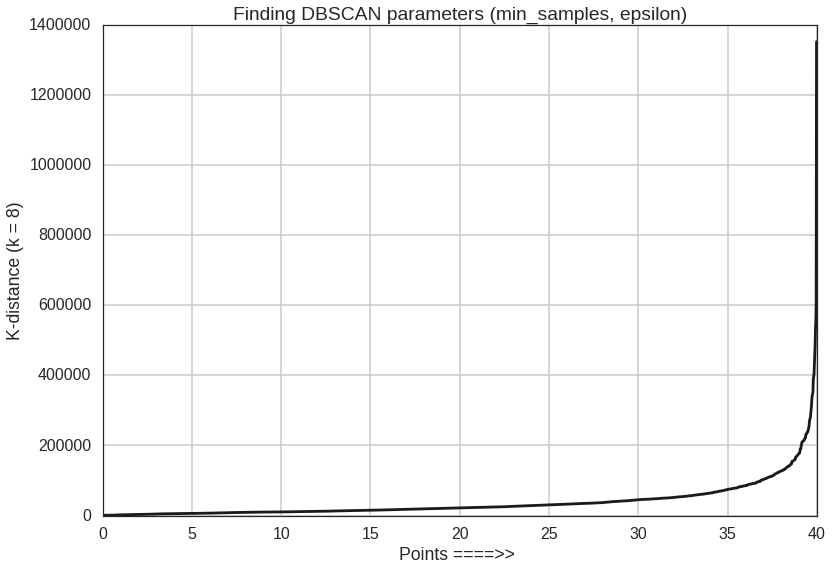

Enter estimated value of eps : 
70000


In [66]:
main.comp_distance_matrix()
main.det_dbscan_params(min_samples=8)

In [67]:
main.perform_dbscan()

Input Array validated ...
Initial Checks successful ...
Neighbors model fitted successfully ...
Neighbours list generation initialised ...

generating n_neighbours for each sample ...
generating initial labels for each sample ...
evaluating is core for each sample ...
Initialising dbscan CPython code ...
-- i =  0 --
i= 0  cnt =  0  stack size =  0
stack size  =  0
i= 0  cnt =  1  stack size =  0
i= 0  cnt =  2  stack size =  1
i= 0  cnt =  3  stack size =  2
i= 0  cnt =  4  stack size =  3
i= 0  cnt =  5  stack size =  4
i= 0  cnt =  6  stack size =  5
i= 0  cnt =  7  stack size =  6
i= 0  cnt =  8  stack size =  7
i= 0  cnt =  9  stack size =  8
i= 0  cnt =  10  stack size =  9
i= 0  cnt =  11  stack size =  10
i= 0  cnt =  12  stack size =  11
i= 0  cnt =  13  stack size =  12
i= 0  cnt =  14  stack size =  13
i= 0  cnt =  15  stack size =  14
i= 0  cnt =  16  stack size =  15
i= 0  cnt =  17  stack size =  16
i= 0  cnt =  18  stack size =  17
i= 0  cnt =  19  stack size =  18
i= 0 

i= 0  cnt =  384  stack size =  382
i= 0  cnt =  385  stack size =  383
i= 0  cnt =  386  stack size =  384
i= 0  cnt =  387  stack size =  385
i= 0  cnt =  388  stack size =  386
i= 0  cnt =  389  stack size =  387
i= 0  cnt =  390  stack size =  388
i= 0  cnt =  391  stack size =  389
i= 0  cnt =  392  stack size =  390
i= 0  cnt =  393  stack size =  391
i= 0  cnt =  394  stack size =  392
i= 0  cnt =  395  stack size =  393
i= 0  cnt =  396  stack size =  394
i= 0  cnt =  397  stack size =  395
i= 0  cnt =  398  stack size =  396
i= 0  cnt =  399  stack size =  397
i= 0  cnt =  400  stack size =  398
i= 0  cnt =  401  stack size =  399
i= 0  cnt =  402  stack size =  400
i= 0  cnt =  403  stack size =  401
i= 0  cnt =  404  stack size =  402
i= 0  cnt =  405  stack size =  403
i= 0  cnt =  406  stack size =  404
i= 0  cnt =  407  stack size =  405
i= 0  cnt =  408  stack size =  406
i= 0  cnt =  409  stack size =  407
i= 0  cnt =  410  stack size =  408
i= 0  cnt =  411  stack size

i= 0  cnt =  815  stack size =  810
i= 0  cnt =  816  stack size =  811
i= 0  cnt =  817  stack size =  812
i= 0  cnt =  818  stack size =  813
i= 0  cnt =  819  stack size =  814
i= 0  cnt =  820  stack size =  815
i= 0  cnt =  821  stack size =  816
i= 0  cnt =  822  stack size =  817
i= 0  cnt =  823  stack size =  818
i= 0  cnt =  824  stack size =  819
i= 0  cnt =  825  stack size =  820
i= 0  cnt =  826  stack size =  821
i= 0  cnt =  827  stack size =  822
i= 0  cnt =  828  stack size =  823
i= 0  cnt =  829  stack size =  824
i= 0  cnt =  830  stack size =  825
i= 0  cnt =  831  stack size =  826
i= 0  cnt =  832  stack size =  827
i= 0  cnt =  833  stack size =  828
i= 0  cnt =  834  stack size =  829
i= 0  cnt =  835  stack size =  830
i= 0  cnt =  836  stack size =  831
i= 0  cnt =  837  stack size =  832
i= 0  cnt =  838  stack size =  833
i= 0  cnt =  839  stack size =  834
i= 0  cnt =  840  stack size =  835
i= 0  cnt =  841  stack size =  836
i= 0  cnt =  842  stack size

i= 0  cnt =  1190  stack size =  1178
i= 0  cnt =  1191  stack size =  1179
i= 0  cnt =  1192  stack size =  1180
i= 0  cnt =  1193  stack size =  1181
i= 0  cnt =  1194  stack size =  1182
i= 0  cnt =  1195  stack size =  1183
i= 0  cnt =  1196  stack size =  1184
i= 0  cnt =  1197  stack size =  1185
i= 0  cnt =  1198  stack size =  1186
i= 0  cnt =  1199  stack size =  1187
i= 0  cnt =  1200  stack size =  1188
i= 0  cnt =  1201  stack size =  1189
i= 0  cnt =  1202  stack size =  1190
i= 0  cnt =  1203  stack size =  1191
i= 0  cnt =  1204  stack size =  1192
i= 0  cnt =  1205  stack size =  1193
i= 0  cnt =  1206  stack size =  1194
i= 0  cnt =  1207  stack size =  1195
i= 0  cnt =  1208  stack size =  1196
i= 0  cnt =  1209  stack size =  1197
i= 0  cnt =  1210  stack size =  1198
i= 0  cnt =  1211  stack size =  1199
i= 0  cnt =  1212  stack size =  1200
i= 0  cnt =  1213  stack size =  1201
i= 0  cnt =  1214  stack size =  1202
i= 0  cnt =  1215  stack size =  1203
i= 0  cnt = 

i= 0  cnt =  1535  stack size =  1469
i= 0  cnt =  1536  stack size =  1470
i= 0  cnt =  1537  stack size =  1471
i= 0  cnt =  1538  stack size =  1472
i= 0  cnt =  1539  stack size =  1473
i= 0  cnt =  1540  stack size =  1474
stack size  =  1474
i= 0  cnt =  1541  stack size =  1474
i= 0  cnt =  1542  stack size =  1475
i= 0  cnt =  1543  stack size =  1476
i= 0  cnt =  1544  stack size =  1477
i= 0  cnt =  1545  stack size =  1478
i= 0  cnt =  1546  stack size =  1479
i= 0  cnt =  1547  stack size =  1480
i= 0  cnt =  1548  stack size =  1481
i= 0  cnt =  1549  stack size =  1482
i= 0  cnt =  1550  stack size =  1483
i= 0  cnt =  1551  stack size =  1484
i= 0  cnt =  1552  stack size =  1485
i= 0  cnt =  1553  stack size =  1486
i= 0  cnt =  1554  stack size =  1487
i= 0  cnt =  1555  stack size =  1488
i= 0  cnt =  1556  stack size =  1489
i= 0  cnt =  1557  stack size =  1490
stack size  =  1490
i= 0  cnt =  1558  stack size =  1490
i= 0  cnt =  1559  stack size =  1491
i= 0  cnt 

stack size  =  638
stack size  =  637
stack size  =  636
stack size  =  635
stack size  =  634
stack size  =  633
stack size  =  632
stack size  =  631
stack size  =  630
stack size  =  629
stack size  =  628
stack size  =  627
stack size  =  626
stack size  =  625
stack size  =  624
stack size  =  623
stack size  =  622
stack size  =  621
stack size  =  620
stack size  =  619
stack size  =  618
stack size  =  617
stack size  =  616
stack size  =  615
stack size  =  614
stack size  =  613
stack size  =  612
stack size  =  611
stack size  =  610
stack size  =  609
stack size  =  608
stack size  =  607
stack size  =  606
stack size  =  605
stack size  =  604
stack size  =  603
stack size  =  602
stack size  =  601
stack size  =  600
stack size  =  599
stack size  =  598
stack size  =  597
stack size  =  596
stack size  =  595
stack size  =  594
stack size  =  593
stack size  =  592
stack size  =  591
stack size  =  590
stack size  =  589
stack size  =  588
stack size  =  587
stack size  

-- i =  390 --
-- i =  391 --
-- i =  392 --
-- i =  393 --
-- i =  394 --
-- i =  395 --
-- i =  396 --
-- i =  397 --
-- i =  398 --
-- i =  399 --
-- i =  400 --
-- i =  401 --
-- i =  402 --
-- i =  403 --
-- i =  404 --
-- i =  405 --
-- i =  406 --
-- i =  407 --
-- i =  408 --
-- i =  409 --
-- i =  410 --
-- i =  411 --
-- i =  412 --
-- i =  413 --
-- i =  414 --
-- i =  415 --
-- i =  416 --
-- i =  417 --
-- i =  418 --
-- i =  419 --
-- i =  420 --
-- i =  421 --
-- i =  422 --
-- i =  423 --
-- i =  424 --
-- i =  425 --
-- i =  426 --
-- i =  427 --
-- i =  428 --
-- i =  429 --
-- i =  430 --
-- i =  431 --
-- i =  432 --
-- i =  433 --
-- i =  434 --
-- i =  435 --
-- i =  436 --
-- i =  437 --
-- i =  438 --
-- i =  439 --
-- i =  440 --
-- i =  441 --
-- i =  442 --
-- i =  443 --
-- i =  444 --
-- i =  445 --
-- i =  446 --
-- i =  447 --
-- i =  448 --
-- i =  449 --
-- i =  450 --
-- i =  451 --
-- i =  452 --
-- i =  453 --
-- i =  454 --
-- i =  455 --
-- i =  45

-- i =  1253 --
-- i =  1254 --
-- i =  1255 --
-- i =  1256 --
-- i =  1257 --
-- i =  1258 --
-- i =  1259 --
-- i =  1260 --
-- i =  1261 --
-- i =  1262 --
-- i =  1263 --
-- i =  1264 --
-- i =  1265 --
-- i =  1266 --
-- i =  1267 --
-- i =  1268 --
-- i =  1269 --
-- i =  1270 --
-- i =  1271 --
-- i =  1272 --
-- i =  1273 --
-- i =  1274 --
-- i =  1275 --
-- i =  1276 --
-- i =  1277 --
-- i =  1278 --
-- i =  1279 --
-- i =  1280 --
-- i =  1281 --
-- i =  1282 --
-- i =  1283 --
-- i =  1284 --
-- i =  1285 --
-- i =  1286 --
-- i =  1287 --
-- i =  1288 --
-- i =  1289 --
-- i =  1290 --
-- i =  1291 --
-- i =  1292 --
-- i =  1293 --
-- i =  1294 --
-- i =  1295 --
-- i =  1296 --
-- i =  1297 --
-- i =  1298 --
-- i =  1299 --
-- i =  1300 --
-- i =  1301 --
-- i =  1302 --
-- i =  1303 --
-- i =  1304 --
-- i =  1305 --
-- i =  1306 --
-- i =  1307 --
-- i =  1308 --
-- i =  1309 --
-- i =  1310 --
-- i =  1311 --
-- i =  1312 --
-- i =  1313 --
-- i =  1314 --
-- i =  

-- i =  1985 --
-- i =  1986 --
-- i =  1987 --
-- i =  1988 --
-- i =  1989 --
-- i =  1990 --
-- i =  1991 --
-- i =  1992 --
-- i =  1993 --
-- i =  1994 --
-- i =  1995 --
-- i =  1996 --
-- i =  1997 --
-- i =  1998 --
-- i =  1999 --
DBSCAN inner successful ...
parameters : {'algorithm': 'auto', 'n_jobs': 1, 'p': None, 'metric': 'precomputed', 'eps': 70000.0, 'leaf_size': 30, 'min_samples': 8}
labels : [0 0 0 ..., 0 0 0]
n_clusters : 2
clusters : {0: 1783, 1: 10, -1: 207}


## 2.6.1  Cluster indices over DBSCAN Clustering  result 

## 2.6.2 External Indices for DBSCAN Clustering result 

In [68]:
val_ext=extval.external_indices(main.class_labels,main.dbscan_results['labels'])
print("\n\nExternal Indices",end='\n\n')
print("entropy:",val_ext.entropy())
print("precision_coefficient:",val_ext.precision_coefficient())
print("recall_coefficient:",val_ext.recall_coefficient())
print("f_measure:",val_ext.f_measure())
print("weighted_f_measure:",val_ext.weighted_f_measure())
print("purity:",val_ext.purity())
print("folkes_mallows_index:",val_ext.folkes_mallows_index())
print("rand_index:",val_ext.rand_index())
print("adjusted_rand_index:",val_ext. adjusted_rand_index())
print("adjusted_mutual_information:",val_ext.adjusted_mutual_information())
print("normalized_mutual_information:",val_ext.normalized_mutual_information())
print("homogeneity_score:",val_ext.homogeneity_score())
print("completness_score:",val_ext.completness_score())
print("v_measure_score:",val_ext.v_measure_score())
print("jaccard_co_eff:",val_ext.jaccard_co_eff())
print("gamma_statistics:",val_ext.hubert_T_index())
print("kulczynski_index:",val_ext. kulczynski_index())
print("mcnemar_index:",val_ext.mcnemar_index())
print("phi_index:",val_ext.phi_index())
print("rogers_tanimoto_index:",val_ext. rogers_tanimoto_index())
print("sokal_sneath_index1:",val_ext.sokal_sneath_index1())



External Indices

entropy: 0.722612421373
precision_coefficient: 0.6287354372836594
recall_coefficient: 0.7915573554491919
f_measure: 0.7008134696731583
weighted_f_measure: 0.7008134696731583
purity: 0.7645
folkes_mallows_index: 0.705464499471
rand_index: 0.5676298149074537
adjusted_rand_index: -0.0427524576133
adjusted_mutual_information: 0.00626084386808
normalized_mutual_information: 0.00885677243162
homogeneity_score: 0.00722899830427
completness_score: 0.0108510770931
v_measure_score: 0.00867722243204
jaccard_co_eff: 0.5394248272392815
gamma_statistics: -0.046636830490845826
kulczynski_index: 0.7101463963664256
mcnemar_index: -560.1163988634369
phi_index: -6.140826972420639e-14
rogers_tanimoto_index: 0.3962870917135006
sokal_sneath_index1: 0.3693235632779402


## 2.6.3 Internal Indices for DBSCAN Clustering result 

In [69]:
val_int=intval.internal_indices(main.data,main.dbscan_results['labels'])

print("Internal Indices",end="\n\n")
print("ball-hall index : ",val_int.ball_hall_index())
print("Banfeld-Raftery index : ",val_int.banfeld_raftery_index())
print("Det Ratio Index : ",val_int.det_ratio_index())
print("Ksq-detw Index  :",val_int.ksq_detw_index())
print("Log-det Ratio Index : ",val_int.log_det_ratio_index())
print("Log SS Ratio Index : ",val_int.log_ss_ratio_index())
#print("Scott-Symons Index : ",val_int.scott_symons_index())(not working for this given dataset)
#print("Trace WiB Index : ",val_int.trace_wib_index())(not working for this given dataset)
print("Sillhoutte Index : ",val_int.silhouette_score())
print("Calinski-Harabasz index : ",val_int.calinski_harabaz_score())
print("C-index : ",val_int.c_index())
print("Dunn Index : ",val_int.dunn_index())
print("Davies Bouldin Index : ",val_int.davies_bouldin_index())
print("Ray-Turi Index : ",val_int.ray_turi_index())
print("Hartigan Index : ",val_int.hartigan_index())
print("PBM Index : ",val_int.pbm_index())

Internal Indices

ball-hall index :  50337649040.1
Banfeld-Raftery index :  48084.3778722
Det Ratio Index :  nan
Ksq-detw Index  : 0.0
Log-det Ratio Index :  nan
Log SS Ratio Index :  -1.1632193652572806
Sillhoutte Index :  0.459628157669
Calinski-Harabasz index :  312.00985929


/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:159: RuntimeWarning: invalid value encountered in double_scalars
  return self.det_T/self.det_WG
/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:165: RuntimeWarning: invalid value encountered in double_scalars
  return self.n_samples * log(self.det_T/self.det_WG)


C-index :  0.173143537354
Dunn Index :  0.01321927549549794
Davies Bouldin Index :  1.39207965322
Ray-Turi Index :  0.417001016765
Hartigan Index :  -1150.00088895
PBM Index :  44835339101.0


## 3 Classification

## 3.1  import dependencied and  Bag

In [70]:
import SRC.Supervised as SUP

In [71]:
main = SUP.Classification()

In [72]:
import pickle 
X=pickle.load(open("DATASETS/UCI_credit_card_bags1.p","rb"))
X

{'data': array([[  3.00000000e+04,   3.30000000e+01,   3.19560000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  1.00000000e+05,   3.40000000e+01,   1.91380000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  8.00000000e+04,   3.10000000e+01,   7.83560000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        ..., 
        [  8.00000000e+04,   2.50000000e+01,   7.41800000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  2.50000000e+05,   3.60000000e+01,   2.50800000e+03, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  8.00000000e+04,   2.90000000e+01,   7.61210000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00]]),
 'target': array([0, 0, 0, ..., 0, 0, 0])}

In [73]:
main.load_data(X["data"],X["target"])

## 3.1.1 Splitting data into test and train using sklearn API
### (test:train = 60:40)

In [74]:
main.train_test_split()

## 3.2.1  Gaussian NB

In [75]:
main.perform_GaussianNB()

labels_test_data : [1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0
 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1

## 3.2.2 Decision Tree

In [76]:
main.perform_DecisionTreeClassifier()

labels_test_data : [0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0
 0 0 1

In [77]:
main.perform_random_forest_classifier()

labels_test_data : [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0
 0 0 1

In [78]:
main.perform_svm_SVC()

labels_test_data : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0

In [79]:
main.perform_QuadraticDiscriminantAnalysis()

labels_test_data : [0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0
 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1

/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


## Bag 3

In [80]:
import pickle 
X=pickle.load(open("DATASETS/UCI_credit_card_bags3.p","rb"))
X

{'data': array([[  1.30000000e+05,   4.40000000e+01,   7.54720000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  5.00000000e+05,   4.60000000e+01,   3.58000000e+03, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  3.90000000e+05,   3.10000000e+01,   5.06200000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        ..., 
        [  3.20000000e+05,   2.70000000e+01,   2.53197000e+05, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  1.00000000e+05,   2.80000000e+01,   7.24640000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  3.30000000e+05,   2.60000000e+01,   1.79887000e+05, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00]]),
 'target': array([1, 0, 0, ..., 1, 1, 1])}

## 1.2 Picking Bag 1 

In [81]:
del main
main = EDA.EDA(False)
main.load_data(X["data"],X["target"])

In [82]:
main.class_labels.shape

(2000,)

## 2 Clustering 

### dependencies for Indices

In [83]:
import SRC.internal_indices as intval
import SRC.external_indices as extval

## 2.1 Kmeans 

In [84]:
main.perform_kmeans(no_clusters=2)

parameters : {'algorithm': 'auto', 'copy_x': True, 'verbose': 0, 'n_jobs': -1, 'random_state': None, 'init': 'k-means++', 'n_init': 10, 'max_iter': 300, 'precompute_distances': 'auto', 'n_clusters': 2, 'tol': 0.0001}
cluster_centers : [[  1.50644609e+05   3.49777524e+01   3.06388888e+04   2.82058962e+04
    2.59797986e+04   2.37194575e+04   2.28422533e+04   2.20954438e+04
    4.31119909e+03   3.92400913e+03   4.12544210e+03   3.97662578e+03
    3.76248888e+03   4.17343639e+03   4.18710782e-01   5.81289218e-01
    1.14090131e-03   3.45693098e-01   4.74044495e-01   1.64860240e-01
    3.99315459e-03   9.12721050e-03   1.14090131e-03   3.42270394e-03
    4.41528808e-01   5.44780376e-01   1.02681118e-02   9.69766115e-02
    2.13918996e-01   4.55219624e-01   1.36908157e-01   8.32857958e-02
    7.41585853e-03   4.56360525e-03   5.70450656e-04   0.00000000e+00
    1.14090131e-03   2.35271871e-17   1.41471763e-01   2.29321164e-01
    4.82030804e-01   5.70450656e-04   1.29492299e-01   1.36908157

## 2.1.1  Cluster indices over Kmeans  result 

## 2.1.2 External Indices for Kmeans result 

In [85]:
val_ext=extval.external_indices(main.class_labels,main.kmeans_results['labels'])
print("\n\nExternal Indices",end='\n\n')
print("entropy:",val_ext.entropy())
print("precision_coefficient:",val_ext.precision_coefficient())
print("recall_coefficient:",val_ext.recall_coefficient())
print("f_measure:",val_ext.f_measure())
print("weighted_f_measure:",val_ext.weighted_f_measure())
print("purity:",val_ext.purity())
print("folkes_mallows_index:",val_ext.folkes_mallows_index())
print("rand_index:",val_ext.rand_index())
print("adjusted_rand_index:",val_ext. adjusted_rand_index())
print("adjusted_mutual_information:",val_ext.adjusted_mutual_information())
print("normalized_mutual_information:",val_ext.normalized_mutual_information())
print("homogeneity_score:",val_ext.homogeneity_score())
print("completness_score:",val_ext.completness_score())
print("v_measure_score:",val_ext.v_measure_score())
print("jaccard_co_eff:",val_ext.jaccard_co_eff())
print("gamma_statistics:",val_ext.hubert_T_index())
print("kulczynski_index:",val_ext. kulczynski_index())
print("mcnemar_index:",val_ext.mcnemar_index())
print("phi_index:",val_ext.phi_index())
print("rogers_tanimoto_index:",val_ext. rogers_tanimoto_index())
print("sokal_sneath_index1:",val_ext.sokal_sneath_index1())



External Indices

entropy: 0.753524609933
precision_coefficient: 0.6581130759784906
recall_coefficient: 0.7804767779209065
f_measure: 0.7140909157047745
weighted_f_measure: 0.7140909157047745
purity: 0.7835
folkes_mallows_index: 0.716688197927
rand_index: 0.5871555777888945
adjusted_rand_index: -0.00943058497662
adjusted_mutual_information: -0.000214501815478
normalized_mutual_information: 0.000314160085381
homogeneity_score: 0.000265751234588
completness_score: 0.000371387020645
v_measure_score: 0.000309812064919
jaccard_co_eff: 0.5553199090246335
gamma_statistics: -0.009886937425169499
kulczynski_index: 0.7192949269496985
mcnemar_index: -476.2371337097966
phi_index: -1.2684676146480502e-14
rogers_tanimoto_index: 0.4155840293229132
sokal_sneath_index1: 0.3843895354366743


## 2.1.3 Internal Indices for Kmeans result 

In [86]:
val_int=intval.internal_indices(main.data,main.kmeans_results['labels'])

print("Internal Indices",end="\n\n")
print("ball-hall index : ",val_int.ball_hall_index())
print("Banfeld-Raftery index : ",val_int.banfeld_raftery_index())
print("Det Ratio Index : ",val_int.det_ratio_index())
print("Ksq-detw Index  :",val_int.ksq_detw_index())
print("Log-det Ratio Index : ",val_int.log_det_ratio_index())
print("Log SS Ratio Index : ",val_int.log_ss_ratio_index())
#print("Scott-Symons Index : ",val_int.scott_symons_index())(not working for this given dataset)
#print("Trace WiB Index : ",val_int.trace_wib_index())(not working for this given dataset)
print("Sillhoutte Index : ",val_int.silhouette_score())
print("Calinski-Harabasz index : ",val_int.calinski_harabaz_score())
print("C-index : ",val_int.c_index())
print("Dunn Index : ",val_int.dunn_index())
print("Davies Bouldin Index : ",val_int.davies_bouldin_index())
print("Ray-Turi Index : ",val_int.ray_turi_index())
print("Hartigan Index : ",val_int.hartigan_index())
print("PBM Index : ",val_int.pbm_index())

Internal Indices

ball-hall index :  49294803687.4
Banfeld-Raftery index :  47951.1290159
Det Ratio Index :  nan
Ksq-detw Index  : 0.0
Log-det Ratio Index :  nan
Log SS Ratio Index :  -0.39276954466841046
Sillhoutte Index :  0.571194837441
Calinski-Harabasz index :  1349.01829031


/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:159: RuntimeWarning: invalid value encountered in double_scalars
  return self.det_T/self.det_WG
/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:165: RuntimeWarning: invalid value encountered in double_scalars
  return self.n_samples * log(self.det_T/self.det_WG)


C-index :  0.101316533863
Dunn Index :  0.011685505879908619
Davies Bouldin Index :  0.851608063153
Ray-Turi Index :  0.160323255847
Hartigan Index :  -1319.54536035
PBM Index :  69324150373.5


## 2.2 HDBSCAN

In [87]:
main.perform_hdbscan()

probabilities : [ 0.         0.         0.        ...,  0.         0.8978286  0.       ]
parameters : {'cluster_selection_method': 'eom', 'p': None, 'prediction_data': False, 'metric': 'euclidean', 'leaf_size': 40, 'match_reference_implementation': False, 'algorithm': 'best', 'allow_single_cluster': False, 'min_samples': None, 'memory': Memory(cachedir=None), 'core_dist_n_jobs': 4, 'min_cluster_size': 15, 'alpha': 1.0, 'approx_min_span_tree': True, 'gen_min_span_tree': False}
labels : [-1 -1 -1 ..., -1  0 -1]
n_clusters : 2
clusters : {0: 1233, 1: 28, -1: 739}


## 2.2.1  Cluster indices over HDBSCAN  result 

## 2.2.2 External Indices for HDBSCAN result 

In [88]:
val_ext=extval.external_indices(main.class_labels,main.hdbscan_results['labels'])
print("\n\nExternal Indices",end='\n\n')
print("entropy:",val_ext.entropy())
print("precision_coefficient:",val_ext.precision_coefficient())
print("recall_coefficient:",val_ext.recall_coefficient())
print("f_measure:",val_ext.f_measure())
print("weighted_f_measure:",val_ext.weighted_f_measure())
print("purity:",val_ext.purity())
print("folkes_mallows_index:",val_ext.folkes_mallows_index())
print("rand_index:",val_ext.rand_index())
print("adjusted_rand_index:",val_ext. adjusted_rand_index())
print("adjusted_mutual_information:",val_ext.adjusted_mutual_information())
print("normalized_mutual_information:",val_ext.normalized_mutual_information())
print("homogeneity_score:",val_ext.homogeneity_score())
print("completness_score:",val_ext.completness_score())
print("v_measure_score:",val_ext.v_measure_score())
print("jaccard_co_eff:",val_ext.jaccard_co_eff())
print("gamma_statistics:",val_ext.hubert_T_index())
print("kulczynski_index:",val_ext. kulczynski_index())
print("mcnemar_index:",val_ext.mcnemar_index())
print("phi_index:",val_ext.phi_index())
print("rogers_tanimoto_index:",val_ext. rogers_tanimoto_index())
print("sokal_sneath_index1:",val_ext.sokal_sneath_index1())



External Indices

entropy: 0.506496630695
precision_coefficient: 0.6537187305405691
recall_coefficient: 0.5111954737979643
f_measure: 0.5737384863961623
weighted_f_measure: 0.5737384863961623
purity: 0.7835
folkes_mallows_index: 0.57808135776
rand_index: 0.49823411705852927
adjusted_rand_index: -0.0143184386328
adjusted_mutual_information: 0.00510840382949
normalized_mutual_information: 0.00684364979884
homogeneity_score: 0.00806655520352
completness_score: 0.00580613922393
v_measure_score: 0.00675219119315
jaccard_co_eff: 0.4022673828914138
gamma_statistics: -0.01496675532244062
kulczynski_index: 0.5824571021692666
mcnemar_index: -44.4654715229711
phi_index: -1.5828408657083007e-14
rogers_tanimoto_index: 0.33176550534138566
sokal_sneath_index1: 0.25177390671249883


## 2.2.3 Internal Indices for HDBSCAN result 

In [89]:
val_int=intval.internal_indices(main.data,main.hdbscan_results['labels'])

print("Internal Indices",end="\n\n")
print("ball-hall index : ",val_int.ball_hall_index())
print("Banfeld-Raftery index : ",val_int.banfeld_raftery_index())
print("Det Ratio Index : ",val_int.det_ratio_index())
print("Ksq-detw Index  :",val_int.ksq_detw_index())
print("Log-det Ratio Index : ",val_int.log_det_ratio_index())
print("Log SS Ratio Index : ",val_int.log_ss_ratio_index())
#print("Scott-Symons Index : ",val_int.scott_symons_index())(not working for this given dataset)
#print("Trace WiB Index : ",val_int.trace_wib_index())(not working for this given dataset)
print("Sillhoutte Index : ",val_int.silhouette_score())
print("Calinski-Harabasz index : ",val_int.calinski_harabaz_score())
print("C-index : ",val_int.c_index())
print("Dunn Index : ",val_int.dunn_index())
print("Davies Bouldin Index : ",val_int.davies_bouldin_index())
print("Ray-Turi Index : ",val_int.ray_turi_index())
print("Hartigan Index : ",val_int.hartigan_index())
print("PBM Index : ",val_int.pbm_index())

Internal Indices

ball-hall index :  29590101469.4
Banfeld-Raftery index :  47839.5141163
Det Ratio Index :  nan
Ksq-detw Index  : 0.0
Log-det Ratio Index :  nan
Log SS Ratio Index :  -1.0539446205990741
Sillhoutte Index :  0.2234537326
Calinski-Harabasz index :  348.037256258


/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:159: RuntimeWarning: invalid value encountered in double_scalars
  return self.det_T/self.det_WG
/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:165: RuntimeWarning: invalid value encountered in double_scalars
  return self.n_samples * log(self.det_T/self.det_WG)


C-index :  0.278662985198
Dunn Index :  0.0028147690918166354
Davies Bouldin Index :  1.29579242879
Ray-Turi Index :  0.756007861686
Hartigan Index :  -1151.04428328
PBM Index :  21382712550.1


## 2.3 Spectral Clustering (Affinity = nearest neighbors)

Input array validated ...
Computing affinity matrix ...
Performing Spectral Embedding ...
Adjacency matrix checked for symetricity ...
Computing graph laplacian ...
Starting set Diagonal ...
Starting eigsh ...
[ -2.95803785e-03   3.77475828e-15]
[[ 0.00191757  0.01972027]
 [ 0.02654311  0.02236068]
 [ 0.02625223  0.02527625]
 ..., 
 [ 0.03146312  0.02236068]
 [ 0.00671708  0.02527625]
 [ 0.02235624  0.02041241]]
Finished eigsh ...


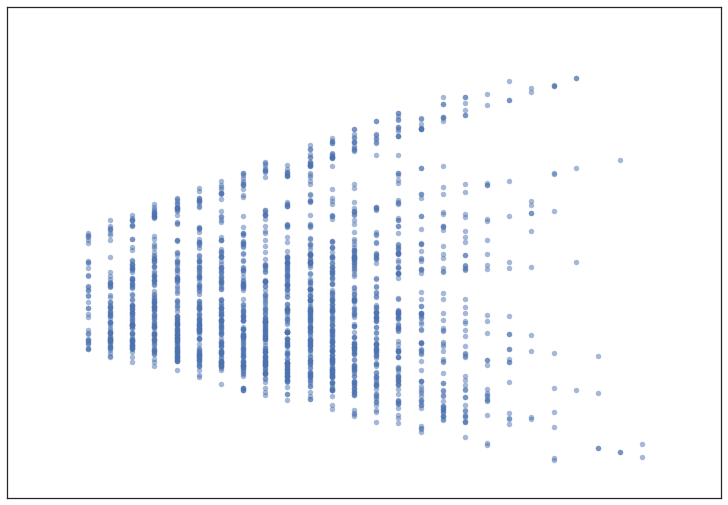

parameters : {'n_neighbors': 10, 'eigen_tol': 0.0, 'coef0': 1, 'gamma': 1.0, 'degree': 3, 'n_init': 10, 'affinity': 'nearest_neighbors', 'eigen_solver': None, 'n_jobs': 1, 'kernel_params': None, 'n_clusters': 2, 'random_state': None, 'assign_labels': 'kmeans'}
labels : [0 0 0 ..., 0 0 0]
n_clusters : 2
clusters : {0: 1299, 1: 701}


In [90]:
main.perform_spectral_clustering(no_clusters=2,affinity="nearest_neighbors")

## 2.3.1  Cluster indices over Spectral Clustering  result 

## 2.3.2 External Indices for Spectral Clustering result 

In [91]:
val_ext=extval.external_indices(main.class_labels,main.spectral_results['labels'])
print("\n\nExternal Indices",end='\n\n')
print("entropy:",val_ext.entropy())
print("precision_coefficient:",val_ext.precision_coefficient())
print("recall_coefficient:",val_ext.recall_coefficient())
print("f_measure:",val_ext.f_measure())
print("weighted_f_measure:",val_ext.weighted_f_measure())
print("purity:",val_ext.purity())
print("folkes_mallows_index:",val_ext.folkes_mallows_index())
print("rand_index:",val_ext.rand_index())
print("adjusted_rand_index:",val_ext. adjusted_rand_index())
print("adjusted_mutual_information:",val_ext.adjusted_mutual_information())
print("normalized_mutual_information:",val_ext.normalized_mutual_information())
print("homogeneity_score:",val_ext.homogeneity_score())
print("completness_score:",val_ext.completness_score())
print("v_measure_score:",val_ext.v_measure_score())
print("jaccard_co_eff:",val_ext.jaccard_co_eff())
print("gamma_statistics:",val_ext.hubert_T_index())
print("kulczynski_index:",val_ext. kulczynski_index())
print("mcnemar_index:",val_ext.mcnemar_index())
print("phi_index:",val_ext.phi_index())
print("rogers_tanimoto_index:",val_ext. rogers_tanimoto_index())
print("sokal_sneath_index1:",val_ext.sokal_sneath_index1())



External Indices

entropy: 0.743576642129
precision_coefficient: 0.6792468952160096
recall_coefficient: 0.5598630507334783
f_measure: 0.6138038681716476
weighted_f_measure: 0.6138038681716476
purity: 0.7835
folkes_mallows_index: 0.616672716242
rand_index: 0.5346153076538269
adjusted_rand_index: 0.041861582317
adjusted_mutual_information: 0.0104769780526
normalized_mutual_information: 0.0120918504077
homogeneity_score: 0.0134641577472
completness_score: 0.0108594127481
v_measure_score: 0.0120223177194
jaccard_co_eff: 0.44279727383314654
gamma_statistics: 0.04311130624617742
kulczynski_index: 0.6195549729747439
mcnemar_index: -23.922027912745943
phi_index: 4.574959892029987e-14
rogers_tanimoto_index: 0.36482932464503515
sokal_sneath_index1: 0.2843542888748456


## 2.3.3 Internal Indices for Spectral Clustering result 

In [92]:
val_int=intval.internal_indices(main.data,main.spectral_results['labels'])

print("Internal Indices",end="\n\n")
print("ball-hall index : ",val_int.ball_hall_index())
print("Banfeld-Raftery index : ",val_int.banfeld_raftery_index())
print("Det Ratio Index : ",val_int.det_ratio_index())
print("Ksq-detw Index  :",val_int.ksq_detw_index())
print("Log-det Ratio Index : ",val_int.log_det_ratio_index())
print("Log SS Ratio Index : ",val_int.log_ss_ratio_index())
#print("Scott-Symons Index : ",val_int.scott_symons_index())(not working for this given dataset)
#print("Trace WiB Index : ",val_int.trace_wib_index())(not working for this given dataset)
print("Sillhoutte Index : ",val_int.silhouette_score())
print("Calinski-Harabasz index : ",val_int.calinski_harabaz_score())
print("C-index : ",val_int.c_index())
print("Dunn Index : ",val_int.dunn_index())
print("Davies Bouldin Index : ",val_int.davies_bouldin_index())
print("Ray-Turi Index : ",val_int.ray_turi_index())
print("Hartigan Index : ",val_int.hartigan_index())
print("PBM Index : ",val_int.pbm_index())

Internal Indices

ball-hall index :  29671016704.3
Banfeld-Raftery index :  47242.480382
Det Ratio Index :  nan
Ksq-detw Index  : 0.0
Log-det Ratio Index :  nan
Log SS Ratio Index :  -1.2844703708598937
Sillhoutte Index :  0.214149563725
Calinski-Harabasz index :  553.040695012


/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:159: RuntimeWarning: invalid value encountered in double_scalars
  return self.det_T/self.det_WG
/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:165: RuntimeWarning: invalid value encountered in double_scalars
  return self.n_samples * log(self.det_T/self.det_WG)


C-index :  0.434157505268
Dunn Index :  0.0021359335112361142
Davies Bouldin Index :  1.13315676791
Ray-Turi Index :  0.822442551881
Hartigan Index :  -1108.25138922
PBM Index :  17466438201.0


## 2.4 Spectral Clustering (Affinity = rbf)

Input array validated ...
Performing Spectral Embedding ...
Adjacency matrix checked for symetricity ...
Computing graph laplacian ...
Starting set Diagonal ...
Starting eigsh ...


/usr/local/lib/python3.5/dist-packages/sklearn/manifold/spectral_embedding_.py:231: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


[  4.44089210e-16   8.88178420e-16]
[[  4.33646625e-19   4.09606979e-20]
 [  4.23467583e-22   8.95911210e-23]
 [ -2.16835803e-18  -9.56454617e-20]
 ..., 
 [  7.49355436e-23  -9.77762801e-20]
 [ -8.67274058e-19  -9.02326778e-20]
 [ -2.71001835e-20  -4.78757321e-21]]
Finished eigsh ...


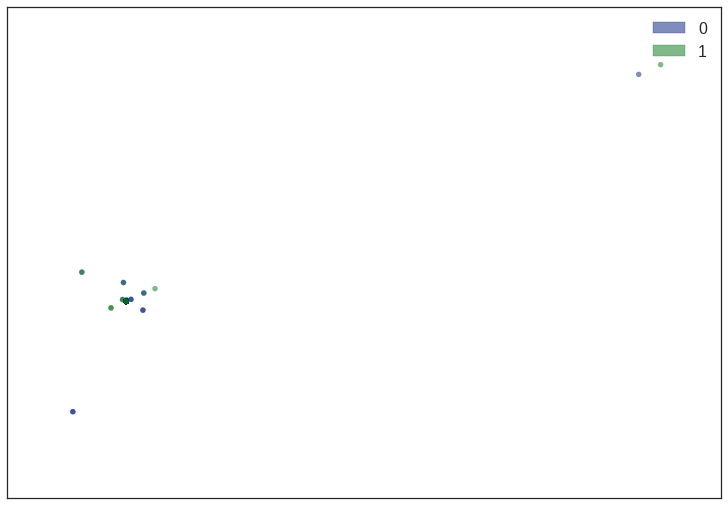

parameters : {'n_neighbors': 10, 'eigen_tol': 0.0, 'coef0': 1, 'gamma': 1.0, 'degree': 3, 'n_init': 10, 'affinity': 'rbf', 'eigen_solver': None, 'n_jobs': 1, 'kernel_params': None, 'n_clusters': 2, 'random_state': None, 'assign_labels': 'kmeans'}
labels : [0 0 0 ..., 0 0 0]
n_clusters : 2
clusters : {0: 1998, 1: 2}


In [93]:
main.perform_spectral_clustering(no_clusters=2,pass_labels=True)

## 2.4.1  Cluster indices over Spectral Clustering  result 

## 2.4.2 External Indices for Spectral Clustering result 

In [94]:
val_ext=extval.external_indices(main.class_labels,main.spectral_results['labels'])
print("\n\nExternal Indices",end='\n\n')
print("entropy:",val_ext.entropy())
print("precision_coefficient:",val_ext.precision_coefficient())
print("recall_coefficient:",val_ext.recall_coefficient())
print("f_measure:",val_ext.f_measure())
print("weighted_f_measure:",val_ext.weighted_f_measure())
print("purity:",val_ext.purity())
print("folkes_mallows_index:",val_ext.folkes_mallows_index())
print("rand_index:",val_ext.rand_index())
print("adjusted_rand_index:",val_ext. adjusted_rand_index())
print("adjusted_mutual_information:",val_ext.adjusted_mutual_information())
print("normalized_mutual_information:",val_ext.normalized_mutual_information())
print("homogeneity_score:",val_ext.homogeneity_score())
print("completness_score:",val_ext.completness_score())
print("v_measure_score:",val_ext.v_measure_score())
print("jaccard_co_eff:",val_ext.jaccard_co_eff())
print("gamma_statistics:",val_ext.hubert_T_index())
print("kulczynski_index:",val_ext. kulczynski_index())
print("mcnemar_index:",val_ext.mcnemar_index())
print("phi_index:",val_ext.phi_index())
print("rogers_tanimoto_index:",val_ext. rogers_tanimoto_index())
print("sokal_sneath_index1:",val_ext.sokal_sneath_index1())



External Indices

entropy: 0.753444793078
precision_coefficient: 0.6608964192552997
recall_coefficient: 0.9984869241621853
f_measure: 0.7953514002291665
weighted_f_measure: 0.7953514002291665
purity: 0.7835
folkes_mallows_index: 0.81234009679
rand_index: 0.6605747873936968
adjusted_rand_index: 0.00188779705123
adjusted_mutual_information: -0.000178599040129
normalized_mutual_information: 0.00302091021914
homogeneity_score: 0.000371647767142
completness_score: 0.0245552357877
v_measure_score: 0.000732213357683
jaccard_co_eff: 0.6602351925536379
gamma_statistics: 0.015176973082245002
kulczynski_index: 0.8296916717087426
mcnemar_index: -818.8666154562715
phi_index: 1.7957864835104287e-13
rogers_tanimoto_index: 0.49317780580546633
sokal_sneath_index1: 0.4927993248397597


## 2.4.3 Internal Indices for Spectral Clustering result 

In [95]:
val_int=intval.internal_indices(main.data,main.spectral_results['labels'])

print("Internal Indices",end="\n\n")
print("ball-hall index : ",val_int.ball_hall_index())
print("Banfeld-Raftery index : ",val_int.banfeld_raftery_index())
print("Det Ratio Index : ",val_int.det_ratio_index())
print("Ksq-detw Index  :",val_int.ksq_detw_index())
print("Log-det Ratio Index : ",val_int.log_det_ratio_index())
print("Log SS Ratio Index : ",val_int.log_ss_ratio_index())
#print("Scott-Symons Index : ",val_int.scott_symons_index())(not working for this given dataset)
#print("Trace WiB Index : ",val_int.trace_wib_index())(not working for this given dataset)
print("Sillhoutte Index : ",val_int.silhouette_score())
print("Calinski-Harabasz index : ",val_int.calinski_harabaz_score())
print("C-index : ",val_int.c_index())
print("Dunn Index : ",val_int.dunn_index())
print("Davies Bouldin Index : ",val_int.davies_bouldin_index())
print("Ray-Turi Index : ",val_int.ray_turi_index())
print("Hartigan Index : ",val_int.hartigan_index())
print("PBM Index : ",val_int.pbm_index())

Internal Indices

ball-hall index :  24210871338.4
Banfeld-Raftery index :  49155.8368334
Det Ratio Index :  nan
Ksq-detw Index  : 0.0
Log-det Ratio Index :  nan
Log SS Ratio Index :  -8.208653247457908
Sillhoutte Index :  -0.314476873674
Calinski-Harabasz index :  0.544029781484


/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:159: RuntimeWarning: invalid value encountered in double_scalars
  return self.det_T/self.det_WG
/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:165: RuntimeWarning: invalid value encountered in double_scalars
  return self.n_samples * log(self.det_T/self.det_WG)


C-index :  0.865452274971
Dunn Index :  1.4594785754436973e-06
Davies Bouldin Index :  1.55665279162
Ray-Turi Index :  3.66892046711
Hartigan Index :  -862.557205669
PBM Index :  3299446420.28


## 2.5 Heirarchical Clustering 

In [96]:
main.perform_hierarchial(no_clusters=2)

Validated input array ...
Computing condensed distance matrix ...
Initialising Cython Code ...
Finsihed executing Cython code
parameters : {'pooling_func': <function mean at 0x7f17f4641bf8>, 'n_clusters': 2, 'memory': Memory(cachedir=None), 'compute_full_tree': 'auto', 'linkage': 'ward', 'affinity': 'euclidean', 'connectivity': None}
labels : [0 0 0 ..., 1 1 1]
n_clusters : 2
clusters : {0: 1560, 1: 440}


## 2.5.1  Cluster indices over Heirarchical Clustering   result

## 2.5.2 External Indices for Heirarchical Clustering  result 

In [97]:
val_ext=extval.external_indices(main.class_labels,main.hierarchial_results['labels'])
print("\n\nExternal Indices",end='\n\n')
print("entropy:",val_ext.entropy())
print("precision_coefficient:",val_ext.precision_coefficient())
print("recall_coefficient:",val_ext.recall_coefficient())
print("f_measure:",val_ext.f_measure())
print("weighted_f_measure:",val_ext.weighted_f_measure())
print("purity:",val_ext.purity())
print("folkes_mallows_index:",val_ext.folkes_mallows_index())
print("rand_index:",val_ext.rand_index())
print("adjusted_rand_index:",val_ext. adjusted_rand_index())
print("adjusted_mutual_information:",val_ext.adjusted_mutual_information())
print("normalized_mutual_information:",val_ext.normalized_mutual_information())
print("homogeneity_score:",val_ext.homogeneity_score())
print("completness_score:",val_ext.completness_score())
print("v_measure_score:",val_ext.v_measure_score())
print("jaccard_co_eff:",val_ext.jaccard_co_eff())
print("gamma_statistics:",val_ext.hubert_T_index())
print("kulczynski_index:",val_ext. kulczynski_index())
print("mcnemar_index:",val_ext.mcnemar_index())
print("phi_index:",val_ext.phi_index())
print("rogers_tanimoto_index:",val_ext. rogers_tanimoto_index())
print("sokal_sneath_index1:",val_ext.sokal_sneath_index1())



External Indices

entropy: 0.753706214701
precision_coefficient: 0.6613324699070547
recall_coefficient: 0.6573814700463237
f_measure: 0.659351051179812
weighted_f_measure: 0.659351051179812
purity: 0.7835
folkes_mallows_index: 0.659354010572
rand_index: 0.551296148074037
adjusted_rand_index: 0.00221266189291
adjusted_mutual_information: -0.000451022657691
normalized_mutual_information: 2.47028493347e-05
homogeneity_score: 2.48082005542e-05
completness_score: 2.45979455027e-05
v_measure_score: 2.4702625643e-05
jaccard_co_eff: 0.49181484217778343
gamma_statistics: 0.0022127471017909903
kulczynski_index: 0.6593569699766892
mcnemar_index: -255.62031338644368
phi_index: 2.4628111034140923e-15
rogers_tanimoto_index: 0.38054440687868857
sokal_sneath_index1: 0.32609712383587725


## 2.5.3 Internal Indices for Heirarchical Clustering  result 

In [98]:
val_int=intval.internal_indices(main.data,main.hierarchial_results['labels'])

print("Internal Indices",end="\n\n")
print("ball-hall index : ",val_int.ball_hall_index())
print("Banfeld-Raftery index : ",val_int.banfeld_raftery_index())
print("Det Ratio Index : ",val_int.det_ratio_index())
print("Ksq-detw Index  :",val_int.ksq_detw_index())
print("Log-det Ratio Index : ",val_int.log_det_ratio_index())
print("Log SS Ratio Index : ",val_int.log_ss_ratio_index())
#print("Scott-Symons Index : ",val_int.scott_symons_index())#(not working for this given dataset)
#print("Trace WiB Index : ",val_int.trace_wib_index())(not working for this given dataset)
print("Sillhoutte Index : ",val_int.silhouette_score())
print("Calinski-Harabasz index : ",val_int.calinski_harabaz_score())
print("C-index : ",val_int.c_index())
print("Dunn Index : ",val_int.dunn_index())
print("Davies Bouldin Index : ",val_int.davies_bouldin_index())
print("Ray-Turi Index : ",val_int.ray_turi_index())
print("Hartigan Index : ",val_int.hartigan_index())
print("PBM Index : ",val_int.pbm_index())

Internal Indices

ball-hall index :  44765383407.4
Banfeld-Raftery index :  47982.6801921
Det Ratio Index :  nan
Ksq-detw Index  : 0.0
Log-det Ratio Index :  nan
Log SS Ratio Index :  -0.5665431317227217
Sillhoutte Index :  0.467780872829
Calinski-Harabasz index :  1133.83256955


/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:159: RuntimeWarning: invalid value encountered in double_scalars
  return self.det_T/self.det_WG
/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:165: RuntimeWarning: invalid value encountered in double_scalars
  return self.n_samples * log(self.det_T/self.det_WG)


C-index :  0.180272717054
Dunn Index :  0.004354325085728121
Davies Bouldin Index :  1.06226515372
Ray-Turi Index :  0.302387503418
Hartigan Index :  -1273.01530466
PBM Index :  39611555177.6


## 2.6 DBSCAN

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

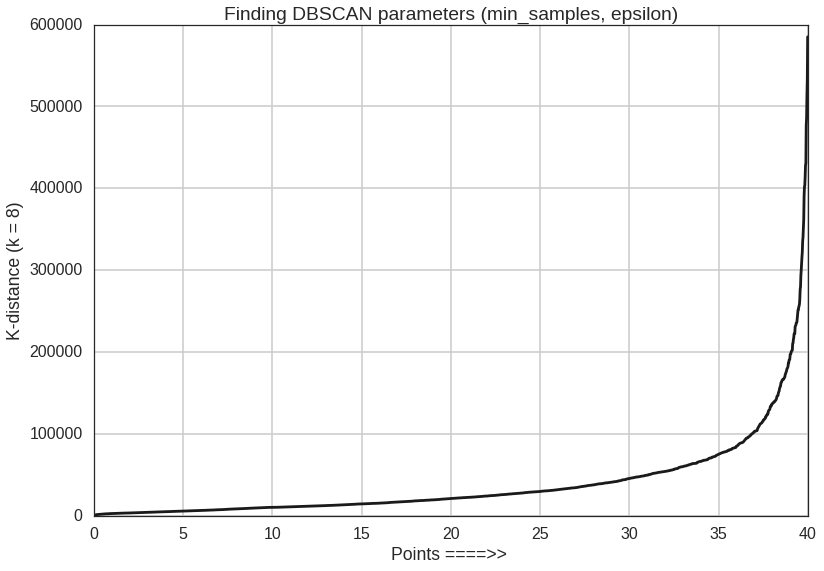

Enter estimated value of eps : 
70000


In [99]:
main.comp_distance_matrix()
main.det_dbscan_params(min_samples=8)

In [100]:
main.perform_dbscan()

Input Array validated ...
Initial Checks successful ...
Neighbors model fitted successfully ...
Neighbours list generation initialised ...

generating n_neighbours for each sample ...
generating initial labels for each sample ...
evaluating is core for each sample ...
Initialising dbscan CPython code ...
-- i =  0 --
i= 0  cnt =  0  stack size =  0
stack size  =  0
i= 0  cnt =  1  stack size =  0
i= 0  cnt =  2  stack size =  1
i= 0  cnt =  3  stack size =  2
i= 0  cnt =  4  stack size =  3
i= 0  cnt =  5  stack size =  4
i= 0  cnt =  6  stack size =  5
i= 0  cnt =  7  stack size =  6
i= 0  cnt =  8  stack size =  7
i= 0  cnt =  9  stack size =  8
i= 0  cnt =  10  stack size =  9
i= 0  cnt =  11  stack size =  10
i= 0  cnt =  12  stack size =  11
i= 0  cnt =  13  stack size =  12
i= 0  cnt =  14  stack size =  13
i= 0  cnt =  15  stack size =  14
i= 0  cnt =  16  stack size =  15
i= 0  cnt =  17  stack size =  16
i= 0  cnt =  18  stack size =  17
i= 0  cnt =  19  stack size =  18
i= 0 

i= 0  cnt =  399  stack size =  393
i= 0  cnt =  400  stack size =  394
i= 0  cnt =  401  stack size =  395
i= 0  cnt =  402  stack size =  396
i= 0  cnt =  403  stack size =  397
i= 0  cnt =  404  stack size =  398
i= 0  cnt =  405  stack size =  399
i= 0  cnt =  406  stack size =  400
i= 0  cnt =  407  stack size =  401
i= 0  cnt =  408  stack size =  402
i= 0  cnt =  409  stack size =  403
i= 0  cnt =  410  stack size =  404
i= 0  cnt =  411  stack size =  405
i= 0  cnt =  412  stack size =  406
i= 0  cnt =  413  stack size =  407
i= 0  cnt =  414  stack size =  408
i= 0  cnt =  415  stack size =  409
i= 0  cnt =  416  stack size =  410
i= 0  cnt =  417  stack size =  411
i= 0  cnt =  418  stack size =  412
i= 0  cnt =  419  stack size =  413
i= 0  cnt =  420  stack size =  414
i= 0  cnt =  421  stack size =  415
i= 0  cnt =  422  stack size =  416
i= 0  cnt =  423  stack size =  417
i= 0  cnt =  424  stack size =  418
i= 0  cnt =  425  stack size =  419
i= 0  cnt =  426  stack size

i= 0  cnt =  820  stack size =  813
i= 0  cnt =  821  stack size =  814
i= 0  cnt =  822  stack size =  815
i= 0  cnt =  823  stack size =  816
i= 0  cnt =  824  stack size =  817
i= 0  cnt =  825  stack size =  818
i= 0  cnt =  826  stack size =  819
i= 0  cnt =  827  stack size =  820
i= 0  cnt =  828  stack size =  821
i= 0  cnt =  829  stack size =  822
i= 0  cnt =  830  stack size =  823
i= 0  cnt =  831  stack size =  824
i= 0  cnt =  832  stack size =  825
i= 0  cnt =  833  stack size =  826
i= 0  cnt =  834  stack size =  827
i= 0  cnt =  835  stack size =  828
i= 0  cnt =  836  stack size =  829
i= 0  cnt =  837  stack size =  830
i= 0  cnt =  838  stack size =  831
i= 0  cnt =  839  stack size =  832
i= 0  cnt =  840  stack size =  833
i= 0  cnt =  841  stack size =  834
i= 0  cnt =  842  stack size =  835
i= 0  cnt =  843  stack size =  836
i= 0  cnt =  844  stack size =  837
i= 0  cnt =  845  stack size =  838
i= 0  cnt =  846  stack size =  839
i= 0  cnt =  847  stack size

i= 0  cnt =  1207  stack size =  995
i= 0  cnt =  1208  stack size =  996
i= 0  cnt =  1209  stack size =  997
i= 0  cnt =  1210  stack size =  998
i= 0  cnt =  1211  stack size =  999
i= 0  cnt =  1212  stack size =  1000
i= 0  cnt =  1213  stack size =  1001
i= 0  cnt =  1214  stack size =  1002
i= 0  cnt =  1215  stack size =  1003
i= 0  cnt =  1216  stack size =  1004
i= 0  cnt =  1217  stack size =  1005
i= 0  cnt =  1218  stack size =  1006
i= 0  cnt =  1219  stack size =  1007
i= 0  cnt =  1220  stack size =  1008
i= 0  cnt =  1221  stack size =  1009
i= 0  cnt =  1222  stack size =  1010
i= 0  cnt =  1223  stack size =  1011
i= 0  cnt =  1224  stack size =  1012
i= 0  cnt =  1225  stack size =  1013
i= 0  cnt =  1226  stack size =  1014
i= 0  cnt =  1227  stack size =  1015
i= 0  cnt =  1228  stack size =  1016
i= 0  cnt =  1229  stack size =  1017
i= 0  cnt =  1230  stack size =  1018
i= 0  cnt =  1231  stack size =  1019
i= 0  cnt =  1232  stack size =  1020
i= 0  cnt =  1233

i= 0  cnt =  1604  stack size =  1298
i= 0  cnt =  1605  stack size =  1299
i= 0  cnt =  1606  stack size =  1300
i= 0  cnt =  1607  stack size =  1301
i= 0  cnt =  1608  stack size =  1302
i= 0  cnt =  1609  stack size =  1303
i= 0  cnt =  1610  stack size =  1304
i= 0  cnt =  1611  stack size =  1305
i= 0  cnt =  1612  stack size =  1306
i= 0  cnt =  1613  stack size =  1307
i= 0  cnt =  1614  stack size =  1308
i= 0  cnt =  1615  stack size =  1309
i= 0  cnt =  1616  stack size =  1310
i= 0  cnt =  1617  stack size =  1311
i= 0  cnt =  1618  stack size =  1312
i= 0  cnt =  1619  stack size =  1313
i= 0  cnt =  1620  stack size =  1314
i= 0  cnt =  1621  stack size =  1315
i= 0  cnt =  1622  stack size =  1316
i= 0  cnt =  1623  stack size =  1317
i= 0  cnt =  1624  stack size =  1318
i= 0  cnt =  1625  stack size =  1319
i= 0  cnt =  1626  stack size =  1320
i= 0  cnt =  1627  stack size =  1321
i= 0  cnt =  1628  stack size =  1322
i= 0  cnt =  1629  stack size =  1323
i= 0  cnt = 

stack size  =  770
stack size  =  769
stack size  =  768
stack size  =  767
stack size  =  766
stack size  =  765
stack size  =  764
stack size  =  763
stack size  =  762
stack size  =  761
stack size  =  760
stack size  =  759
stack size  =  758
stack size  =  757
stack size  =  756
stack size  =  755
stack size  =  754
stack size  =  753
stack size  =  752
stack size  =  751
stack size  =  750
stack size  =  749
stack size  =  748
stack size  =  747
stack size  =  746
stack size  =  745
stack size  =  744
stack size  =  743
stack size  =  742
stack size  =  741
stack size  =  740
stack size  =  739
stack size  =  738
stack size  =  737
stack size  =  736
stack size  =  735
stack size  =  734
stack size  =  733
stack size  =  732
stack size  =  731
stack size  =  730
stack size  =  729
stack size  =  728
stack size  =  727
stack size  =  726
stack size  =  725
stack size  =  724
stack size  =  723
stack size  =  722
stack size  =  721
stack size  =  720
stack size  =  719
stack size  

-- i =  291 --
-- i =  292 --
-- i =  293 --
-- i =  294 --
-- i =  295 --
-- i =  296 --
-- i =  297 --
-- i =  298 --
-- i =  299 --
-- i =  300 --
-- i =  301 --
-- i =  302 --
-- i =  303 --
-- i =  304 --
-- i =  305 --
-- i =  306 --
-- i =  307 --
-- i =  308 --
-- i =  309 --
-- i =  310 --
-- i =  311 --
-- i =  312 --
-- i =  313 --
-- i =  314 --
-- i =  315 --
-- i =  316 --
-- i =  317 --
-- i =  318 --
-- i =  319 --
-- i =  320 --
-- i =  321 --
-- i =  322 --
-- i =  323 --
-- i =  324 --
-- i =  325 --
-- i =  326 --
-- i =  327 --
-- i =  328 --
-- i =  329 --
-- i =  330 --
-- i =  331 --
-- i =  332 --
-- i =  333 --
-- i =  334 --
-- i =  335 --
-- i =  336 --
-- i =  337 --
-- i =  338 --
-- i =  339 --
-- i =  340 --
-- i =  341 --
-- i =  342 --
-- i =  343 --
-- i =  344 --
-- i =  345 --
-- i =  346 --
-- i =  347 --
-- i =  348 --
-- i =  349 --
-- i =  350 --
-- i =  351 --
-- i =  352 --
-- i =  353 --
-- i =  354 --
-- i =  355 --
-- i =  356 --
-- i =  35

-- i =  1226 --
-- i =  1227 --
-- i =  1228 --
-- i =  1229 --
-- i =  1230 --
-- i =  1231 --
-- i =  1232 --
-- i =  1233 --
-- i =  1234 --
-- i =  1235 --
-- i =  1236 --
-- i =  1237 --
-- i =  1238 --
-- i =  1239 --
-- i =  1240 --
-- i =  1241 --
-- i =  1242 --
-- i =  1243 --
-- i =  1244 --
-- i =  1245 --
-- i =  1246 --
-- i =  1247 --
-- i =  1248 --
-- i =  1249 --
-- i =  1250 --
-- i =  1251 --
-- i =  1252 --
-- i =  1253 --
-- i =  1254 --
-- i =  1255 --
-- i =  1256 --
-- i =  1257 --
-- i =  1258 --
-- i =  1259 --
-- i =  1260 --
-- i =  1261 --
-- i =  1262 --
-- i =  1263 --
-- i =  1264 --
-- i =  1265 --
-- i =  1266 --
-- i =  1267 --
-- i =  1268 --
-- i =  1269 --
-- i =  1270 --
-- i =  1271 --
-- i =  1272 --
-- i =  1273 --
-- i =  1274 --
-- i =  1275 --
-- i =  1276 --
-- i =  1277 --
-- i =  1278 --
-- i =  1279 --
-- i =  1280 --
-- i =  1281 --
-- i =  1282 --
-- i =  1283 --
-- i =  1284 --
-- i =  1285 --
-- i =  1286 --
-- i =  1287 --
-- i =  

## 2.6.1  Cluster indices over DBSCAN Clustering  result 

## 2.6.2 External Indices for DBSCAN Clustering result 

In [101]:
val_ext=extval.external_indices(main.class_labels,main.dbscan_results['labels'])
print("\n\nExternal Indices",end='\n\n')
print("entropy:",val_ext.entropy())
print("precision_coefficient:",val_ext.precision_coefficient())
print("recall_coefficient:",val_ext.recall_coefficient())
print("f_measure:",val_ext.f_measure())
print("weighted_f_measure:",val_ext.weighted_f_measure())
print("purity:",val_ext.purity())
print("folkes_mallows_index:",val_ext.folkes_mallows_index())
print("rand_index:",val_ext.rand_index())
print("adjusted_rand_index:",val_ext. adjusted_rand_index())
print("adjusted_mutual_information:",val_ext.adjusted_mutual_information())
print("normalized_mutual_information:",val_ext.normalized_mutual_information())
print("homogeneity_score:",val_ext.homogeneity_score())
print("completness_score:",val_ext.completness_score())
print("v_measure_score:",val_ext.v_measure_score())
print("jaccard_co_eff:",val_ext.jaccard_co_eff())
print("gamma_statistics:",val_ext.hubert_T_index())
print("kulczynski_index:",val_ext. kulczynski_index())
print("mcnemar_index:",val_ext.mcnemar_index())
print("phi_index:",val_ext.phi_index())
print("rogers_tanimoto_index:",val_ext. rogers_tanimoto_index())
print("sokal_sneath_index1:",val_ext.sokal_sneath_index1())



External Indices

entropy: 0.691931378771
precision_coefficient: 0.6563685574445287
recall_coefficient: 0.8201787368164369
f_measure: 0.7291869842886781
weighted_f_measure: 0.7291869842886781
purity: 0.7835
folkes_mallows_index: 0.733716249194
rand_index: 0.5975692846423212
adjusted_rand_index: -0.0175579484042
adjusted_mutual_information: -3.4338929633e-05
normalized_mutual_information: 0.00123383193892
homogeneity_score: 0.000989252184991
completness_score: 0.00153888086032
v_measure_score: 0.00120432052129
jaccard_co_eff: 0.5737956530768807
gamma_statistics: -0.01931623110281983
kulczynski_index: 0.7382736471304828
mcnemar_index: -552.9842923288259
phi_index: -2.6893260260901327e-14
rogers_tanimoto_index: 0.42609540571130167
sokal_sneath_index1: 0.4023235901045894


## 2.6.3 Internal Indices for DBSCAN Clustering result 

In [102]:
val_int=intval.internal_indices(main.data,main.dbscan_results['labels'])

print("Internal Indices",end="\n\n")
print("ball-hall index : ",val_int.ball_hall_index())
print("Banfeld-Raftery index : ",val_int.banfeld_raftery_index())
print("Det Ratio Index : ",val_int.det_ratio_index())
print("Ksq-detw Index  :",val_int.ksq_detw_index())
print("Log-det Ratio Index : ",val_int.log_det_ratio_index())
print("Log SS Ratio Index : ",val_int.log_ss_ratio_index())
#print("Scott-Symons Index : ",val_int.scott_symons_index())(not working for this given dataset)
#print("Trace WiB Index : ",val_int.trace_wib_index())(not working for this given dataset)
print("Sillhoutte Index : ",val_int.silhouette_score())
print("Calinski-Harabasz index : ",val_int.calinski_harabaz_score())
print("C-index : ",val_int.c_index())
print("Dunn Index : ",val_int.dunn_index())
print("Davies Bouldin Index : ",val_int.davies_bouldin_index())
print("Ray-Turi Index : ",val_int.ray_turi_index())
print("Hartigan Index : ",val_int.hartigan_index())
print("PBM Index : ",val_int.pbm_index())

Internal Indices

ball-hall index :  56281976296.5
Banfeld-Raftery index :  48366.1152775
Det Ratio Index :  nan
Ksq-detw Index  : 0.0
Log-det Ratio Index :  nan
Log SS Ratio Index :  -1.2631933743846067
Sillhoutte Index :  0.46384566041
Calinski-Harabasz index :  282.325533273


/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:159: RuntimeWarning: invalid value encountered in double_scalars
  return self.det_T/self.det_WG
/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:165: RuntimeWarning: invalid value encountered in double_scalars
  return self.n_samples * log(self.det_T/self.det_WG)


C-index :  0.195723688565
Dunn Index :  0.01354319530194923
Davies Bouldin Index :  1.35763079182
Ray-Turi Index :  0.35114730486
Hartigan Index :  -1107.69798199
PBM Index :  53424758277.8


## 3 Classification

## 3.1  import dependencied and  Bag

In [103]:
import SRC.Supervised as SUP

In [104]:
main = SUP.Classification()

In [105]:
import pickle 
X=pickle.load(open("DATASETS/UCI_credit_card_bags1.p","rb"))
X

{'data': array([[  3.00000000e+04,   3.30000000e+01,   3.19560000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  1.00000000e+05,   3.40000000e+01,   1.91380000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  8.00000000e+04,   3.10000000e+01,   7.83560000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        ..., 
        [  8.00000000e+04,   2.50000000e+01,   7.41800000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  2.50000000e+05,   3.60000000e+01,   2.50800000e+03, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  8.00000000e+04,   2.90000000e+01,   7.61210000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00]]),
 'target': array([0, 0, 0, ..., 0, 0, 0])}

In [106]:
main.load_data(X["data"],X["target"])

## 3.1.1 Splitting data into test and train using sklearn API
### (test:train = 60:40)

In [107]:
main.train_test_split()

## 3.2.1  Gaussian NB

In [108]:
main.perform_GaussianNB()

labels_test_data : [1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0
 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1

## 3.2.2 Decision Tree

In [109]:
main.perform_DecisionTreeClassifier()

labels_test_data : [0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1
 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0
 0 0 1

In [110]:
main.perform_random_forest_classifier()

labels_test_data : [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0

In [111]:
main.perform_svm_SVC()

labels_test_data : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0

In [112]:
main.perform_QuadraticDiscriminantAnalysis()

labels_test_data : [0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0
 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1

/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


## Bag 4

In [114]:
import pickle 
X=pickle.load(open("DATASETS/UCI_credit_card_bags4.p","rb"))
X

{'data': array([[  1.30000000e+05,   2.90000000e+01,   8.67000000e+02, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  3.00000000e+04,   3.50000000e+01,   2.78730000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  3.00000000e+05,   3.90000000e+01,  -3.92800000e+03, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        ..., 
        [  2.00000000e+05,   2.60000000e+01,   2.36400000e+03, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  7.00000000e+04,   2.80000000e+01,   2.05960000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  2.80000000e+05,   5.20000000e+01,   8.86000000e+02, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00]]),
 'target': array([0, 0, 1, ..., 0, 0, 0])}

## 1.2 Picking Bag 1 

In [115]:
del main
main = EDA.EDA(False)
main.load_data(X["data"],X["target"])

In [116]:
main.class_labels.shape

(2000,)

## 2 Clustering 

### dependencies for Indices

In [117]:
import SRC.internal_indices as intval
import SRC.external_indices as extval

## 2.1 Kmeans 

In [118]:
main.perform_kmeans(no_clusters=2)

parameters : {'algorithm': 'auto', 'copy_x': True, 'verbose': 0, 'n_jobs': -1, 'random_state': None, 'init': 'k-means++', 'n_init': 10, 'max_iter': 300, 'precompute_distances': 'auto', 'n_clusters': 2, 'tol': 0.0001}
cluster_centers : [[  1.50651542e+05   3.50983130e+01   2.78359657e+04   2.56919314e+04
    2.46032682e+04   2.29786946e+04   2.23154863e+04   2.08460582e+04
    4.20935486e+03   4.68655556e+03   4.60760093e+03   4.64671495e+03
    3.90046713e+03   4.26398720e+03   3.86852821e-01   6.13147179e-01
    1.16346713e-03   3.49040140e-01   4.67132054e-01   1.68702734e-01
    2.32693426e-03   9.30773706e-03   2.32693426e-03   2.32693426e-03
    4.56079116e-01   5.29377545e-01   1.22164049e-02   1.13438045e-01
    2.07097150e-01   4.37463642e-01   1.35543921e-01   8.37696335e-02
    2.03606748e-02   1.74520070e-03   5.81733566e-04   0.00000000e+00
    0.00000000e+00   0.00000000e+00   1.58813264e-01   2.29784759e-01
    4.60732984e-01   0.00000000e+00   1.33798720e-01   1.33798720

## 2.1.1  Cluster indices over Kmeans  result 

## 2.1.2 External Indices for Kmeans result 

In [119]:
val_ext=extval.external_indices(main.class_labels,main.kmeans_results['labels'])
print("\n\nExternal Indices",end='\n\n')
print("entropy:",val_ext.entropy())
print("precision_coefficient:",val_ext.precision_coefficient())
print("recall_coefficient:",val_ext.recall_coefficient())
print("f_measure:",val_ext.f_measure())
print("weighted_f_measure:",val_ext.weighted_f_measure())
print("purity:",val_ext.purity())
print("folkes_mallows_index:",val_ext.folkes_mallows_index())
print("rand_index:",val_ext.rand_index())
print("adjusted_rand_index:",val_ext. adjusted_rand_index())
print("adjusted_mutual_information:",val_ext.adjusted_mutual_information())
print("normalized_mutual_information:",val_ext.normalized_mutual_information())
print("homogeneity_score:",val_ext.homogeneity_score())
print("completness_score:",val_ext.completness_score())
print("v_measure_score:",val_ext.v_measure_score())
print("jaccard_co_eff:",val_ext.jaccard_co_eff())
print("gamma_statistics:",val_ext.hubert_T_index())
print("kulczynski_index:",val_ext. kulczynski_index())
print("mcnemar_index:",val_ext.mcnemar_index())
print("phi_index:",val_ext.phi_index())
print("rogers_tanimoto_index:",val_ext. rogers_tanimoto_index())
print("sokal_sneath_index1:",val_ext.sokal_sneath_index1())



External Indices

entropy: 0.78039265768
precision_coefficient: 0.6378877820735493
recall_coefficient: 0.7517810830477588
f_measure: 0.6901672473295632
weighted_f_measure: 0.6901672473295632
purity: 0.768
folkes_mallows_index: 0.692496908058
rand_index: 0.5656673336668334
adjusted_rand_index: -0.0198800742656
adjusted_mutual_information: 0.000930897638924
normalized_mutual_information: 0.00160961552321
homogeneity_score: 0.0013932966658
completness_score: 0.00185951936594
v_measure_score: 0.00159299641128
jaccard_co_eff: 0.5269124977387203
gamma_statistics: -0.02064556686781984
kulczynski_index: 0.6948344325606541
mcnemar_index: -456.2707837535077
phi_index: -2.519803306828487e-14
rogers_tanimoto_index: 0.3943766651518486
sokal_sneath_index1: 0.3576925993397387


## 2.1.3 Internal Indices for Kmeans result 

In [120]:
val_int=intval.internal_indices(main.data,main.kmeans_results['labels'])

print("Internal Indices",end="\n\n")
print("ball-hall index : ",val_int.ball_hall_index())
print("Banfeld-Raftery index : ",val_int.banfeld_raftery_index())
print("Det Ratio Index : ",val_int.det_ratio_index())
print("Ksq-detw Index  :",val_int.ksq_detw_index())
print("Log-det Ratio Index : ",val_int.log_det_ratio_index())
print("Log SS Ratio Index : ",val_int.log_ss_ratio_index())
#print("Scott-Symons Index : ",val_int.scott_symons_index())(not working for this given dataset)
#print("Trace WiB Index : ",val_int.trace_wib_index())(not working for this given dataset)
print("Sillhoutte Index : ",val_int.silhouette_score())
print("Calinski-Harabasz index : ",val_int.calinski_harabaz_score())
print("C-index : ",val_int.c_index())
print("Dunn Index : ",val_int.dunn_index())
print("Davies Bouldin Index : ",val_int.davies_bouldin_index())
print("Ray-Turi Index : ",val_int.ray_turi_index())
print("Hartigan Index : ",val_int.hartigan_index())
print("PBM Index : ",val_int.pbm_index())

Internal Indices

ball-hall index :  37338247549.7
Banfeld-Raftery index :  47827.9613347
Det Ratio Index :  nan
Ksq-detw Index  : 0.0
Log-det Ratio Index :  nan
Log SS Ratio Index :  -0.3616933623526116
Sillhoutte Index :  0.547549499077
Calinski-Harabasz index :  1391.59882212


/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:159: RuntimeWarning: invalid value encountered in double_scalars
  return self.det_T/self.det_WG
/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:165: RuntimeWarning: invalid value encountered in double_scalars
  return self.n_samples * log(self.det_T/self.det_WG)


C-index :  0.103672731263
Dunn Index :  0.013378344284772557
Davies Bouldin Index :  0.848973799022
Ray-Turi Index :  0.173381851626
Hartigan Index :  -1357.49862248
PBM Index :  59306362640.5


## 2.2 HDBSCAN

In [121]:
main.perform_hdbscan()

probabilities : [ 0.  1.  0. ...,  0.  0.  0.]
parameters : {'cluster_selection_method': 'eom', 'p': None, 'prediction_data': False, 'metric': 'euclidean', 'leaf_size': 40, 'match_reference_implementation': False, 'algorithm': 'best', 'allow_single_cluster': False, 'min_samples': None, 'memory': Memory(cachedir=None), 'core_dist_n_jobs': 4, 'min_cluster_size': 15, 'alpha': 1.0, 'approx_min_span_tree': True, 'gen_min_span_tree': False}
labels : [-1  5 -1 ..., -1 -1 -1]
n_clusters : 15
clusters : {0: 21, 1: 44, 2: 29, 3: 17, 4: 32, 5: 47, 6: 53, 7: 28, 8: 29, 9: 15, 10: 15, 11: 76, 12: 15, 13: 16, 14: 20, -1: 1543}


## 2.2.1  Cluster indices over HDBSCAN  result 

## 2.2.2 External Indices for HDBSCAN result 

In [122]:
val_ext=extval.external_indices(main.class_labels,main.hdbscan_results['labels'])
print("\n\nExternal Indices",end='\n\n')
print("entropy:",val_ext.entropy())
print("precision_coefficient:",val_ext.precision_coefficient())
print("recall_coefficient:",val_ext.recall_coefficient())
print("f_measure:",val_ext.f_measure())
print("weighted_f_measure:",val_ext.weighted_f_measure())
print("purity:",val_ext.purity())
print("folkes_mallows_index:",val_ext.folkes_mallows_index())
print("rand_index:",val_ext.rand_index())
print("adjusted_rand_index:",val_ext. adjusted_rand_index())
print("adjusted_mutual_information:",val_ext.adjusted_mutual_information())
print("normalized_mutual_information:",val_ext.normalized_mutual_information())
print("homogeneity_score:",val_ext.homogeneity_score())
print("completness_score:",val_ext.completness_score())
print("v_measure_score:",val_ext.v_measure_score())
print("jaccard_co_eff:",val_ext.jaccard_co_eff())
print("gamma_statistics:",val_ext.hubert_T_index())
print("kulczynski_index:",val_ext. kulczynski_index())
print("mcnemar_index:",val_ext.mcnemar_index())
print("phi_index:",val_ext.phi_index())
print("rogers_tanimoto_index:",val_ext. rogers_tanimoto_index())
print("sokal_sneath_index1:",val_ext.sokal_sneath_index1())



External Indices

entropy: 0.206707783339
precision_coefficient: 0.6862247771293172
recall_coefficient: 0.6394212529619931
f_measure: 0.6619967877478861
weighted_f_measure: 0.6619967877478861
purity: 0.772
folkes_mallows_index: 0.662409772577
rand_index: 0.5798444222111055
adjusted_rand_index: 0.108755864468
adjusted_mutual_information: 0.0135472055684
normalized_mutual_information: 0.0244599271899
homogeneity_score: 0.0352431747557
completness_score: 0.0169759972614
v_measure_score: 0.0229144973015
jaccard_co_eff: 0.4947647223010919
gamma_statistics: 0.1092302272027137
kulczynski_index: 0.6628230150456551
mcnemar_index: -46.736744386639394
phi_index: 1.1647264776560192e-13
rogers_tanimoto_index: 0.40829640870325773
sokal_sneath_index1: 0.3286959385229474


## 2.2.3 Internal Indices for HDBSCAN result 

In [123]:
val_int=intval.internal_indices(main.data,main.hdbscan_results['labels'])

print("Internal Indices",end="\n\n")
print("ball-hall index : ",val_int.ball_hall_index())
print("Banfeld-Raftery index : ",val_int.banfeld_raftery_index())
print("Det Ratio Index : ",val_int.det_ratio_index())
print("Ksq-detw Index  :",val_int.ksq_detw_index())
print("Log-det Ratio Index : ",val_int.log_det_ratio_index())
print("Log SS Ratio Index : ",val_int.log_ss_ratio_index())
#print("Scott-Symons Index : ",val_int.scott_symons_index())(not working for this given dataset)
#print("Trace WiB Index : ",val_int.trace_wib_index())(not working for this given dataset)
print("Sillhoutte Index : ",val_int.silhouette_score())
print("Calinski-Harabasz index : ",val_int.calinski_harabaz_score())
print("C-index : ",val_int.c_index())
print("Dunn Index : ",val_int.dunn_index())
print("Davies Bouldin Index : ",val_int.davies_bouldin_index())
print("Ray-Turi Index : ",val_int.ray_turi_index())
print("Hartigan Index : ",val_int.hartigan_index())
print("PBM Index : ",val_int.pbm_index())

Internal Indices

ball-hall index :  3127807969.21
Banfeld-Raftery index :  46202.9911527
Det Ratio Index :  nan
Ksq-detw Index  : 0.0
Log-det Ratio Index :  nan
Log SS Ratio Index :  -1.8221260979621443
Sillhoutte Index :  -0.336313524867
Calinski-Harabasz index :  21.3850908245


/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:159: RuntimeWarning: invalid value encountered in double_scalars
  return self.det_T/self.det_WG
/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:165: RuntimeWarning: invalid value encountered in double_scalars
  return self.n_samples * log(self.det_T/self.det_WG)


C-index :  0.60461706423
Dunn Index :  2.1290437588277185e-06
Davies Bouldin Index :  1.25074708863
Ray-Turi Index :  99.9683513492
Hartigan Index :  -1048.96045544
PBM Index :  686846924.795


## 2.3 Spectral Clustering (Affinity = nearest neighbors)

Input array validated ...
Computing affinity matrix ...
Performing Spectral Embedding ...
Adjacency matrix checked for symetricity ...
Computing graph laplacian ...
Starting set Diagonal ...
Starting eigsh ...
[ -2.84200072e-03  -2.44249065e-15]
[[ 0.00235484  0.02415229]
 [-0.03775679  0.02738613]
 [ 0.01150198  0.01581139]
 ..., 
 [ 0.01025235  0.01900292]
 [-0.0131595   0.01748015]
 [ 0.02104474  0.02357023]]
Finished eigsh ...


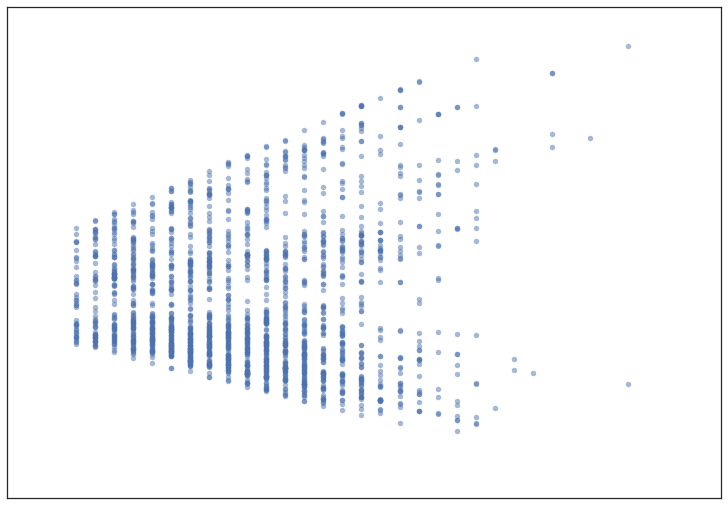

parameters : {'n_neighbors': 10, 'eigen_tol': 0.0, 'coef0': 1, 'gamma': 1.0, 'degree': 3, 'n_init': 10, 'affinity': 'nearest_neighbors', 'eigen_solver': None, 'n_jobs': 1, 'kernel_params': None, 'n_clusters': 2, 'random_state': None, 'assign_labels': 'kmeans'}
labels : [1 0 1 ..., 1 0 1]
n_clusters : 2
clusters : {0: 767, 1: 1233}


In [124]:
main.perform_spectral_clustering(no_clusters=2,affinity="nearest_neighbors")

## 2.3.1  Cluster indices over Spectral Clustering  result 

## 2.3.2 External Indices for Spectral Clustering result 

In [125]:
val_ext=extval.external_indices(main.class_labels,main.spectral_results['labels'])
print("\n\nExternal Indices",end='\n\n')
print("entropy:",val_ext.entropy())
print("precision_coefficient:",val_ext.precision_coefficient())
print("recall_coefficient:",val_ext.recall_coefficient())
print("f_measure:",val_ext.f_measure())
print("weighted_f_measure:",val_ext.weighted_f_measure())
print("purity:",val_ext.purity())
print("folkes_mallows_index:",val_ext.folkes_mallows_index())
print("rand_index:",val_ext.rand_index())
print("adjusted_rand_index:",val_ext. adjusted_rand_index())
print("adjusted_mutual_information:",val_ext.adjusted_mutual_information())
print("normalized_mutual_information:",val_ext.normalized_mutual_information())
print("homogeneity_score:",val_ext.homogeneity_score())
print("completness_score:",val_ext.completness_score())
print("v_measure_score:",val_ext.v_measure_score())
print("jaccard_co_eff:",val_ext.jaccard_co_eff())
print("gamma_statistics:",val_ext.hubert_T_index())
print("kulczynski_index:",val_ext. kulczynski_index())
print("mcnemar_index:",val_ext.mcnemar_index())
print("phi_index:",val_ext.phi_index())
print("rogers_tanimoto_index:",val_ext. rogers_tanimoto_index())
print("sokal_sneath_index1:",val_ext.sokal_sneath_index1())



External Indices

entropy: 0.765834687352
precision_coefficient: 0.6648669073730001
recall_coefficient: 0.5444291205134744
f_measure: 0.5986506153869169
weighted_f_measure: 0.5986506153869169
purity: 0.768
folkes_mallows_index: 0.601641841663
rand_index: 0.5302696348174087
adjusted_rand_index: 0.0458046730953
adjusted_mutual_information: 0.0159206732792
normalized_mutual_information: 0.0180602174089
homogeneity_score: 0.020021978796
completness_score: 0.016290670177
v_measure_score: 0.017964619056
jaccard_co_eff: 0.4271958313609323
gamma_statistics: 0.0471453298388665
kulczynski_index: 0.6046480139432373
mcnemar_index: 7.960029457578486
phi_index: 4.9335624074887904e-14
rogers_tanimoto_index: 0.360793821356158
sokal_sneath_index1: 0.2716141270979595


## 2.3.3 Internal Indices for Spectral Clustering result 

In [126]:
val_int=intval.internal_indices(main.data,main.spectral_results['labels'])

print("Internal Indices",end="\n\n")
print("ball-hall index : ",val_int.ball_hall_index())
print("Banfeld-Raftery index : ",val_int.banfeld_raftery_index())
print("Det Ratio Index : ",val_int.det_ratio_index())
print("Ksq-detw Index  :",val_int.ksq_detw_index())
print("Log-det Ratio Index : ",val_int.log_det_ratio_index())
print("Log SS Ratio Index : ",val_int.log_ss_ratio_index())
#print("Scott-Symons Index : ",val_int.scott_symons_index())(not working for this given dataset)
#print("Trace WiB Index : ",val_int.trace_wib_index())(not working for this given dataset)
print("Sillhoutte Index : ",val_int.silhouette_score())
print("Calinski-Harabasz index : ",val_int.calinski_harabaz_score())
print("C-index : ",val_int.c_index())
print("Dunn Index : ",val_int.dunn_index())
print("Davies Bouldin Index : ",val_int.davies_bouldin_index())
print("Ray-Turi Index : ",val_int.ray_turi_index())
print("Hartigan Index : ",val_int.hartigan_index())
print("PBM Index : ",val_int.pbm_index())

Internal Indices

ball-hall index :  26874131857.8
Banfeld-Raftery index :  46992.7235202
Det Ratio Index :  nan
Ksq-detw Index  : 0.0
Log-det Ratio Index :  nan
Log SS Ratio Index :  -1.0570804795986353
Sillhoutte Index :  0.264141009149
Calinski-Harabasz index :  694.242608653


/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:159: RuntimeWarning: invalid value encountered in double_scalars
  return self.det_T/self.det_WG
/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:165: RuntimeWarning: invalid value encountered in double_scalars
  return self.n_samples * log(self.det_T/self.det_WG)


C-index :  0.384583548253
Dunn Index :  0.0020728542707410184
Davies Bouldin Index :  1.11193355488
Ray-Turi Index :  0.680428770306
Hartigan Index :  -1191.85298447
PBM Index :  19155303889.8


## 2.4 Spectral Clustering (Affinity = rbf)

Input array validated ...
Performing Spectral Embedding ...
Adjacency matrix checked for symetricity ...
Computing graph laplacian ...
Starting set Diagonal ...
Starting eigsh ...


/usr/local/lib/python3.5/dist-packages/sklearn/manifold/spectral_embedding_.py:231: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


[  4.44089210e-16   4.44089210e-16]
[[ -8.40624563e-20   5.66445455e-21]
 [  2.61079153e-19  -6.10581662e-21]
 [ -4.43242831e-19   4.49952878e-20]
 ..., 
 [  2.03803267e-19  -1.10575661e-20]
 [ -1.67231949e-18   2.09859917e-20]
 [  1.43008556e-18  -9.32547144e-20]]
Finished eigsh ...


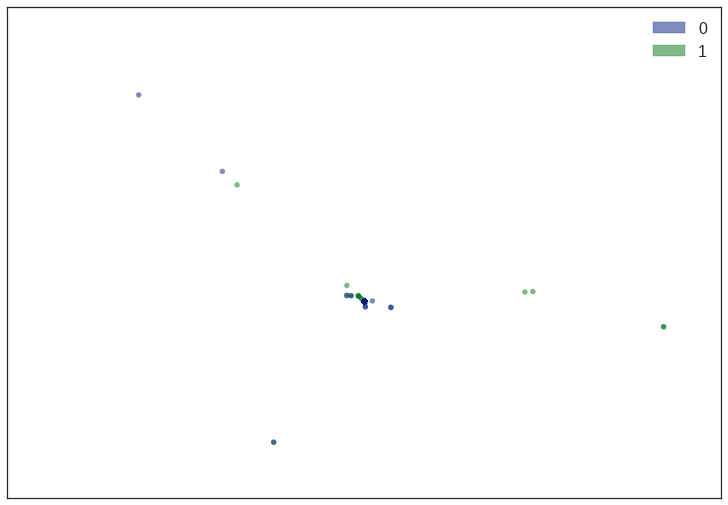

parameters : {'n_neighbors': 10, 'eigen_tol': 0.0, 'coef0': 1, 'gamma': 1.0, 'degree': 3, 'n_init': 10, 'affinity': 'rbf', 'eigen_solver': None, 'n_jobs': 1, 'kernel_params': None, 'n_clusters': 2, 'random_state': None, 'assign_labels': 'kmeans'}
labels : [0 0 0 ..., 0 0 0]
n_clusters : 2
clusters : {0: 1997, 1: 3}


In [127]:
main.perform_spectral_clustering(no_clusters=2,pass_labels=True)

## 2.4.1  Cluster indices over Spectral Clustering  result 

## 2.4.2 External Indices for Spectral Clustering result 

In [128]:
val_ext=extval.external_indices(main.class_labels,main.spectral_results['labels'])
print("\n\nExternal Indices",end='\n\n')
print("entropy:",val_ext.entropy())
print("precision_coefficient:",val_ext.precision_coefficient())
print("recall_coefficient:",val_ext.recall_coefficient())
print("f_measure:",val_ext.f_measure())
print("weighted_f_measure:",val_ext.weighted_f_measure())
print("purity:",val_ext.purity())
print("folkes_mallows_index:",val_ext.folkes_mallows_index())
print("rand_index:",val_ext.rand_index())
print("adjusted_rand_index:",val_ext. adjusted_rand_index())
print("adjusted_mutual_information:",val_ext.adjusted_mutual_information())
print("normalized_mutual_information:",val_ext.normalized_mutual_information())
print("homogeneity_score:",val_ext.homogeneity_score())
print("completness_score:",val_ext.completness_score())
print("v_measure_score:",val_ext.v_measure_score())
print("jaccard_co_eff:",val_ext.jaccard_co_eff())
print("gamma_statistics:",val_ext.hubert_T_index())
print("kulczynski_index:",val_ext. kulczynski_index())
print("mcnemar_index:",val_ext.mcnemar_index())
print("phi_index:",val_ext.phi_index())
print("rogers_tanimoto_index:",val_ext. rogers_tanimoto_index())
print("sokal_sneath_index1:",val_ext.sokal_sneath_index1())



External Indices

entropy: 0.781424119869
precision_coefficient: 0.643632316763246
recall_coefficient: 0.9972549086679894
f_measure: 0.7823395506059974
weighted_f_measure: 0.7823395506059974
purity: 0.768
folkes_mallows_index: 0.80116508116
rand_index: 0.6429339669834917
adjusted_rand_index: 0.000907101694471
adjusted_mutual_information: -0.00048491384591
normalized_mutual_information: 0.000509381183298
homogeneity_score: 7.3416158598e-05
completness_score: 0.00353422454748
v_measure_score: 0.000143844252262
jaccard_co_eff: 0.6424940146453364
gamma_statistics: 0.006191058247134191
kulczynski_index: 0.8204436127156176
mcnemar_index: -838.390102619454
phi_index: 5.917462883722074e-14
rogers_tanimoto_index: 0.47376763646081965
sokal_sneath_index1: 0.47329000503631496


## 2.4.3 Internal Indices for Spectral Clustering result 

In [129]:
val_int=intval.internal_indices(main.data,main.spectral_results['labels'])

print("Internal Indices",end="\n\n")
print("ball-hall index : ",val_int.ball_hall_index())
print("Banfeld-Raftery index : ",val_int.banfeld_raftery_index())
print("Det Ratio Index : ",val_int.det_ratio_index())
print("Ksq-detw Index  :",val_int.ksq_detw_index())
print("Log-det Ratio Index : ",val_int.log_det_ratio_index())
print("Log SS Ratio Index : ",val_int.log_ss_ratio_index())
#print("Scott-Symons Index : ",val_int.scott_symons_index())(not working for this given dataset)
#print("Trace WiB Index : ",val_int.trace_wib_index())(not working for this given dataset)
print("Sillhoutte Index : ",val_int.silhouette_score())
print("Calinski-Harabasz index : ",val_int.calinski_harabaz_score())
print("C-index : ",val_int.c_index())
print("Dunn Index : ",val_int.dunn_index())
print("Davies Bouldin Index : ",val_int.davies_bouldin_index())
print("Ray-Turi Index : ",val_int.ray_turi_index())
print("Hartigan Index : ",val_int.hartigan_index())
print("PBM Index : ",val_int.pbm_index())

Internal Indices

ball-hall index :  21934305577.0
Banfeld-Raftery index :  48935.063043
Det Ratio Index :  nan
Ksq-detw Index  : 0.0
Log-det Ratio Index :  nan
Log SS Ratio Index :  -6.392163451372517
Sillhoutte Index :  0.0775599688421
Calinski-Harabasz index :  3.34590934227


/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:159: RuntimeWarning: invalid value encountered in double_scalars
  return self.det_T/self.det_WG
/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:165: RuntimeWarning: invalid value encountered in double_scalars
  return self.n_samples * log(self.det_T/self.det_WG)


C-index :  0.761018193587
Dunn Index :  1.5036039548510145e-06
Davies Bouldin Index :  0.795285362424
Ray-Turi Index :  0.8943770419
Hartigan Index :  -913.903324251
PBM Index :  12292296324.7


## 2.5 Heirarchical Clustering 

In [130]:
main.perform_hierarchial(no_clusters=2)

Validated input array ...
Computing condensed distance matrix ...
Initialising Cython Code ...
Finsihed executing Cython code
parameters : {'pooling_func': <function mean at 0x7f17f4641bf8>, 'n_clusters': 2, 'memory': Memory(cachedir=None), 'compute_full_tree': 'auto', 'linkage': 'ward', 'affinity': 'euclidean', 'connectivity': None}
labels : [1 1 0 ..., 1 1 1]
n_clusters : 2
clusters : {0: 698, 1: 1302}


## 2.5.1  Cluster indices over Heirarchical Clustering   result

## 2.5.2 External Indices for Heirarchical Clustering  result 

In [131]:
val_ext=extval.external_indices(main.class_labels,main.hierarchial_results['labels'])
print("\n\nExternal Indices",end='\n\n')
print("entropy:",val_ext.entropy())
print("precision_coefficient:",val_ext.precision_coefficient())
print("recall_coefficient:",val_ext.recall_coefficient())
print("f_measure:",val_ext.f_measure())
print("weighted_f_measure:",val_ext.weighted_f_measure())
print("purity:",val_ext.purity())
print("folkes_mallows_index:",val_ext.folkes_mallows_index())
print("rand_index:",val_ext.rand_index())
print("adjusted_rand_index:",val_ext. adjusted_rand_index())
print("adjusted_mutual_information:",val_ext.adjusted_mutual_information())
print("normalized_mutual_information:",val_ext.normalized_mutual_information())
print("homogeneity_score:",val_ext.homogeneity_score())
print("completness_score:",val_ext.completness_score())
print("v_measure_score:",val_ext.v_measure_score())
print("jaccard_co_eff:",val_ext.jaccard_co_eff())
print("gamma_statistics:",val_ext.hubert_T_index())
print("kulczynski_index:",val_ext. kulczynski_index())
print("mcnemar_index:",val_ext.mcnemar_index())
print("phi_index:",val_ext.phi_index())
print("rogers_tanimoto_index:",val_ext. rogers_tanimoto_index())
print("sokal_sneath_index1:",val_ext.sokal_sneath_index1())



External Indices

entropy: 0.77213727336
precision_coefficient: 0.6336814027466419
recall_coefficient: 0.5370785573460541
f_measure: 0.581394487691984
weighted_f_measure: 0.581394487691984
purity: 0.768
folkes_mallows_index: 0.583383830427
rand_index: 0.5023431715857929
adjusted_rand_index: -0.0219241293441
adjusted_mutual_information: 0.00963011430757
normalized_mutual_information: 0.0109421558886
homogeneity_score: 0.0119570584323
completness_score: 0.0100133972053
v_measure_score: 0.0108992528389
jaccard_co_eff: 0.40983520975191884
gamma_statistics: -0.022382939211607174
kulczynski_index: 0.585379980046348
mcnemar_index: -101.89311516977698
phi_index: -2.3485778928874965e-14
rogers_tanimoto_index: 0.33541941121298036
sokal_sneath_index1: 0.25773128185537336


## 2.5.3 Internal Indices for Heirarchical Clustering  result 

In [132]:
val_int=intval.internal_indices(main.data,main.hierarchial_results['labels'])

print("Internal Indices",end="\n\n")
print("ball-hall index : ",val_int.ball_hall_index())
print("Banfeld-Raftery index : ",val_int.banfeld_raftery_index())
print("Det Ratio Index : ",val_int.det_ratio_index())
print("Ksq-detw Index  :",val_int.ksq_detw_index())
print("Log-det Ratio Index : ",val_int.log_det_ratio_index())
print("Log SS Ratio Index : ",val_int.log_ss_ratio_index())
#print("Scott-Symons Index : ",val_int.scott_symons_index())#(not working for this given dataset)
#print("Trace WiB Index : ",val_int.trace_wib_index())(not working for this given dataset)
print("Sillhoutte Index : ",val_int.silhouette_score())
print("Calinski-Harabasz index : ",val_int.calinski_harabaz_score())
print("C-index : ",val_int.c_index())
print("Dunn Index : ",val_int.dunn_index())
print("Davies Bouldin Index : ",val_int.davies_bouldin_index())
print("Ray-Turi Index : ",val_int.ray_turi_index())
print("Hartigan Index : ",val_int.hartigan_index())
print("PBM Index : ",val_int.pbm_index())

Internal Indices

ball-hall index :  36816624048.5
Banfeld-Raftery index :  47171.7871493
Det Ratio Index :  nan
Ksq-detw Index  : 0.0
Log-det Ratio Index :  nan
Log SS Ratio Index :  -0.5986996060420018
Sillhoutte Index :  0.429517460165
Calinski-Harabasz index :  1097.95249177


/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:159: RuntimeWarning: invalid value encountered in double_scalars
  return self.det_T/self.det_WG
/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:165: RuntimeWarning: invalid value encountered in double_scalars
  return self.n_samples * log(self.det_T/self.det_WG)


C-index :  0.161667177553
Dunn Index :  0.007908180906268358
Davies Bouldin Index :  1.20953687507
Ray-Turi Index :  0.413445577474
Hartigan Index :  -1296.84355148
PBM Index :  28469809349.4


## 2.6 DBSCAN

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999


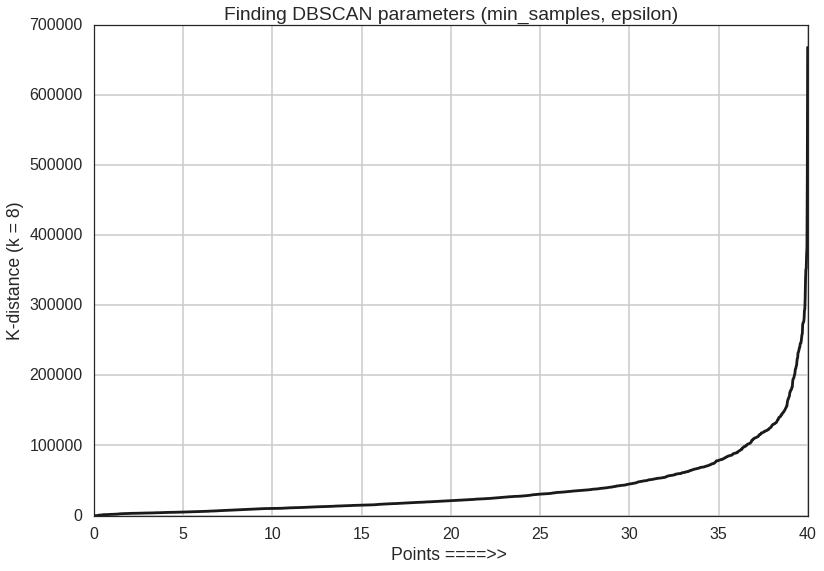

Enter estimated value of eps : 
70000


In [133]:
main.comp_distance_matrix()
main.det_dbscan_params(min_samples=8)

In [134]:
main.perform_dbscan()

Input Array validated ...
Initial Checks successful ...
Neighbors model fitted successfully ...
Neighbours list generation initialised ...

generating n_neighbours for each sample ...
generating initial labels for each sample ...
evaluating is core for each sample ...
Initialising dbscan CPython code ...
-- i =  0 --
i= 0  cnt =  0  stack size =  0
stack size  =  0
i= 0  cnt =  1  stack size =  0
i= 0  cnt =  2  stack size =  1
i= 0  cnt =  3  stack size =  2
i= 0  cnt =  4  stack size =  3
i= 0  cnt =  5  stack size =  4
i= 0  cnt =  6  stack size =  5
i= 0  cnt =  7  stack size =  6
i= 0  cnt =  8  stack size =  7
i= 0  cnt =  9  stack size =  8
i= 0  cnt =  10  stack size =  9
i= 0  cnt =  11  stack size =  10
i= 0  cnt =  12  stack size =  11
i= 0  cnt =  13  stack size =  12
i= 0  cnt =  14  stack size =  13
i= 0  cnt =  15  stack size =  14
i= 0  cnt =  16  stack size =  15
i= 0  cnt =  17  stack size =  16
i= 0  cnt =  18  stack size =  17
i= 0  cnt =  19  stack size =  18
i= 0 

i= 0  cnt =  394  stack size =  392
i= 0  cnt =  395  stack size =  393
i= 0  cnt =  396  stack size =  394
i= 0  cnt =  397  stack size =  395
i= 0  cnt =  398  stack size =  396
i= 0  cnt =  399  stack size =  397
i= 0  cnt =  400  stack size =  398
i= 0  cnt =  401  stack size =  399
i= 0  cnt =  402  stack size =  400
i= 0  cnt =  403  stack size =  401
i= 0  cnt =  404  stack size =  402
i= 0  cnt =  405  stack size =  403
i= 0  cnt =  406  stack size =  404
i= 0  cnt =  407  stack size =  405
i= 0  cnt =  408  stack size =  406
i= 0  cnt =  409  stack size =  407
i= 0  cnt =  410  stack size =  408
i= 0  cnt =  411  stack size =  409
i= 0  cnt =  412  stack size =  410
i= 0  cnt =  413  stack size =  411
i= 0  cnt =  414  stack size =  412
i= 0  cnt =  415  stack size =  413
i= 0  cnt =  416  stack size =  414
i= 0  cnt =  417  stack size =  415
i= 0  cnt =  418  stack size =  416
i= 0  cnt =  419  stack size =  417
i= 0  cnt =  420  stack size =  418
i= 0  cnt =  421  stack size

i= 0  cnt =  833  stack size =  829
i= 0  cnt =  834  stack size =  830
i= 0  cnt =  835  stack size =  831
i= 0  cnt =  836  stack size =  832
i= 0  cnt =  837  stack size =  833
i= 0  cnt =  838  stack size =  834
i= 0  cnt =  839  stack size =  835
i= 0  cnt =  840  stack size =  836
i= 0  cnt =  841  stack size =  837
i= 0  cnt =  842  stack size =  838
i= 0  cnt =  843  stack size =  839
i= 0  cnt =  844  stack size =  840
i= 0  cnt =  845  stack size =  841
i= 0  cnt =  846  stack size =  842
i= 0  cnt =  847  stack size =  843
i= 0  cnt =  848  stack size =  844
i= 0  cnt =  849  stack size =  845
i= 0  cnt =  850  stack size =  846
i= 0  cnt =  851  stack size =  847
i= 0  cnt =  852  stack size =  848
i= 0  cnt =  853  stack size =  849
i= 0  cnt =  854  stack size =  850
i= 0  cnt =  855  stack size =  851
i= 0  cnt =  856  stack size =  852
i= 0  cnt =  857  stack size =  853
i= 0  cnt =  858  stack size =  854
i= 0  cnt =  859  stack size =  855
i= 0  cnt =  860  stack size

i= 0  cnt =  1255  stack size =  1232
i= 0  cnt =  1256  stack size =  1233
i= 0  cnt =  1257  stack size =  1234
i= 0  cnt =  1258  stack size =  1235
i= 0  cnt =  1259  stack size =  1236
i= 0  cnt =  1260  stack size =  1237
i= 0  cnt =  1261  stack size =  1238
i= 0  cnt =  1262  stack size =  1239
i= 0  cnt =  1263  stack size =  1240
i= 0  cnt =  1264  stack size =  1241
i= 0  cnt =  1265  stack size =  1242
i= 0  cnt =  1266  stack size =  1243
i= 0  cnt =  1267  stack size =  1244
i= 0  cnt =  1268  stack size =  1245
i= 0  cnt =  1269  stack size =  1246
i= 0  cnt =  1270  stack size =  1247
i= 0  cnt =  1271  stack size =  1248
i= 0  cnt =  1272  stack size =  1249
i= 0  cnt =  1273  stack size =  1250
i= 0  cnt =  1274  stack size =  1251
i= 0  cnt =  1275  stack size =  1252
i= 0  cnt =  1276  stack size =  1253
i= 0  cnt =  1277  stack size =  1254
i= 0  cnt =  1278  stack size =  1255
i= 0  cnt =  1279  stack size =  1256
i= 0  cnt =  1280  stack size =  1257
i= 0  cnt = 

i= 0  cnt =  1602  stack size =  1399
i= 0  cnt =  1603  stack size =  1400
i= 0  cnt =  1604  stack size =  1401
i= 0  cnt =  1605  stack size =  1402
i= 0  cnt =  1606  stack size =  1403
i= 0  cnt =  1607  stack size =  1404
i= 0  cnt =  1608  stack size =  1405
i= 0  cnt =  1609  stack size =  1406
stack size  =  1405
i= 0  cnt =  1610  stack size =  1405
i= 0  cnt =  1611  stack size =  1406
i= 0  cnt =  1612  stack size =  1407
i= 0  cnt =  1613  stack size =  1408
i= 0  cnt =  1614  stack size =  1409
i= 0  cnt =  1615  stack size =  1410
stack size  =  1410
stack size  =  1409
i= 0  cnt =  1616  stack size =  1409
i= 0  cnt =  1617  stack size =  1410
i= 0  cnt =  1618  stack size =  1411
i= 0  cnt =  1619  stack size =  1412
i= 0  cnt =  1620  stack size =  1413
i= 0  cnt =  1621  stack size =  1414
i= 0  cnt =  1622  stack size =  1415
i= 0  cnt =  1623  stack size =  1416
i= 0  cnt =  1624  stack size =  1417
i= 0  cnt =  1625  stack size =  1418
i= 0  cnt =  1626  stack siz

stack size  =  604
stack size  =  603
stack size  =  602
stack size  =  601
stack size  =  600
stack size  =  599
stack size  =  598
stack size  =  597
stack size  =  596
stack size  =  595
stack size  =  594
stack size  =  593
stack size  =  592
stack size  =  591
stack size  =  590
stack size  =  589
stack size  =  588
stack size  =  587
stack size  =  586
i= 0  cnt =  1774  stack size =  586
stack size  =  585
stack size  =  584
stack size  =  583
stack size  =  582
stack size  =  581
stack size  =  580
stack size  =  579
stack size  =  578
stack size  =  577
stack size  =  576
stack size  =  575
stack size  =  574
stack size  =  573
stack size  =  572
stack size  =  571
stack size  =  570
stack size  =  569
stack size  =  568
stack size  =  567
stack size  =  566
stack size  =  565
stack size  =  564
stack size  =  563
stack size  =  562
stack size  =  561
stack size  =  560
stack size  =  559
stack size  =  558
stack size  =  557
stack size  =  556
stack size  =  555
stack size  =

-- i =  292 --
-- i =  293 --
-- i =  294 --
-- i =  295 --
-- i =  296 --
-- i =  297 --
-- i =  298 --
-- i =  299 --
-- i =  300 --
-- i =  301 --
-- i =  302 --
-- i =  303 --
-- i =  304 --
-- i =  305 --
-- i =  306 --
-- i =  307 --
-- i =  308 --
-- i =  309 --
-- i =  310 --
-- i =  311 --
-- i =  312 --
-- i =  313 --
-- i =  314 --
-- i =  315 --
-- i =  316 --
-- i =  317 --
-- i =  318 --
-- i =  319 --
-- i =  320 --
-- i =  321 --
-- i =  322 --
-- i =  323 --
-- i =  324 --
-- i =  325 --
-- i =  326 --
-- i =  327 --
-- i =  328 --
-- i =  329 --
-- i =  330 --
-- i =  331 --
-- i =  332 --
-- i =  333 --
-- i =  334 --
-- i =  335 --
-- i =  336 --
-- i =  337 --
-- i =  338 --
-- i =  339 --
-- i =  340 --
-- i =  341 --
-- i =  342 --
-- i =  343 --
-- i =  344 --
-- i =  345 --
-- i =  346 --
-- i =  347 --
-- i =  348 --
-- i =  349 --
-- i =  350 --
-- i =  351 --
-- i =  352 --
-- i =  353 --
-- i =  354 --
-- i =  355 --
-- i =  356 --
-- i =  357 --
-- i =  35

-- i =  1136 --
-- i =  1137 --
-- i =  1138 --
-- i =  1139 --
-- i =  1140 --
-- i =  1141 --
-- i =  1142 --
-- i =  1143 --
-- i =  1144 --
-- i =  1145 --
-- i =  1146 --
-- i =  1147 --
-- i =  1148 --
-- i =  1149 --
-- i =  1150 --
-- i =  1151 --
-- i =  1152 --
-- i =  1153 --
-- i =  1154 --
-- i =  1155 --
-- i =  1156 --
-- i =  1157 --
-- i =  1158 --
-- i =  1159 --
-- i =  1160 --
-- i =  1161 --
-- i =  1162 --
-- i =  1163 --
-- i =  1164 --
-- i =  1165 --
-- i =  1166 --
-- i =  1167 --
-- i =  1168 --
-- i =  1169 --
-- i =  1170 --
-- i =  1171 --
-- i =  1172 --
-- i =  1173 --
-- i =  1174 --
-- i =  1175 --
-- i =  1176 --
-- i =  1177 --
-- i =  1178 --
-- i =  1179 --
-- i =  1180 --
-- i =  1181 --
-- i =  1182 --
-- i =  1183 --
-- i =  1184 --
-- i =  1185 --
-- i =  1186 --
-- i =  1187 --
-- i =  1188 --
-- i =  1189 --
-- i =  1190 --
-- i =  1191 --
-- i =  1192 --
-- i =  1193 --
-- i =  1194 --
-- i =  1195 --
-- i =  1196 --
-- i =  1197 --
-- i =  

-- i =  1822 --
-- i =  1823 --
-- i =  1824 --
-- i =  1825 --
-- i =  1826 --
-- i =  1827 --
-- i =  1828 --
-- i =  1829 --
-- i =  1830 --
-- i =  1831 --
-- i =  1832 --
-- i =  1833 --
-- i =  1834 --
-- i =  1835 --
-- i =  1836 --
-- i =  1837 --
-- i =  1838 --
-- i =  1839 --
-- i =  1840 --
-- i =  1841 --
-- i =  1842 --
-- i =  1843 --
-- i =  1844 --
-- i =  1845 --
-- i =  1846 --
-- i =  1847 --
-- i =  1848 --
-- i =  1849 --
-- i =  1850 --
-- i =  1851 --
-- i =  1852 --
-- i =  1853 --
-- i =  1854 --
-- i =  1855 --
-- i =  1856 --
-- i =  1857 --
-- i =  1858 --
-- i =  1859 --
-- i =  1860 --
-- i =  1861 --
-- i =  1862 --
-- i =  1863 --
-- i =  1864 --
-- i =  1865 --
-- i =  1866 --
-- i =  1867 --
-- i =  1868 --
-- i =  1869 --
-- i =  1870 --
-- i =  1871 --
-- i =  1872 --
-- i =  1873 --
-- i =  1874 --
-- i =  1875 --
-- i =  1876 --
-- i =  1877 --
-- i =  1878 --
-- i =  1879 --
-- i =  1880 --
-- i =  1881 --
-- i =  1882 --
-- i =  1883 --
-- i =  

## 2.6.1  Cluster indices over DBSCAN Clustering  result 

## 2.6.2 External Indices for DBSCAN Clustering result 

In [135]:
val_ext=extval.external_indices(main.class_labels,main.dbscan_results['labels'])
print("\n\nExternal Indices",end='\n\n')
print("entropy:",val_ext.entropy())
print("precision_coefficient:",val_ext.precision_coefficient())
print("recall_coefficient:",val_ext.recall_coefficient())
print("f_measure:",val_ext.f_measure())
print("weighted_f_measure:",val_ext.weighted_f_measure())
print("purity:",val_ext.purity())
print("folkes_mallows_index:",val_ext.folkes_mallows_index())
print("rand_index:",val_ext.rand_index())
print("adjusted_rand_index:",val_ext. adjusted_rand_index())
print("adjusted_mutual_information:",val_ext.adjusted_mutual_information())
print("normalized_mutual_information:",val_ext.normalized_mutual_information())
print("homogeneity_score:",val_ext.homogeneity_score())
print("completness_score:",val_ext.completness_score())
print("v_measure_score:",val_ext.v_measure_score())
print("jaccard_co_eff:",val_ext.jaccard_co_eff())
print("gamma_statistics:",val_ext.hubert_T_index())
print("kulczynski_index:",val_ext. kulczynski_index())
print("mcnemar_index:",val_ext.mcnemar_index())
print("phi_index:",val_ext.phi_index())
print("rogers_tanimoto_index:",val_ext. rogers_tanimoto_index())
print("sokal_sneath_index1:",val_ext.sokal_sneath_index1())



External Indices

entropy: 0.706951744084
precision_coefficient: 0.6372727847273542
recall_coefficient: 0.791750110394497
f_measure: 0.7061619507730391
weighted_f_measure: 0.7061619507730391
purity: 0.768
folkes_mallows_index: 0.71032443127
rand_index: 0.5760155077538769
adjusted_rand_index: -0.0239286730561
adjusted_mutual_information: 0.00126786208288
normalized_mutual_information: 0.00275838630643
homogeneity_score: 0.00227140270737
completness_score: 0.00334977808684
v_measure_score: 0.00270715185797
jaccard_co_eff: 0.5457885175002813
gamma_statistics: -0.025831463279002667
kulczynski_index: 0.7145114475609255
mcnemar_index: -529.0624102753995
phi_index: -3.3705714753145964e-14
rogers_tanimoto_index: 0.40450967752134603
sokal_sneath_index1: 0.37531578045450276


## 2.6.3 Internal Indices for DBSCAN Clustering result 

In [136]:
val_int=intval.internal_indices(main.data,main.dbscan_results['labels'])

print("Internal Indices",end="\n\n")
print("ball-hall index : ",val_int.ball_hall_index())
print("Banfeld-Raftery index : ",val_int.banfeld_raftery_index())
print("Det Ratio Index : ",val_int.det_ratio_index())
print("Ksq-detw Index  :",val_int.ksq_detw_index())
print("Log-det Ratio Index : ",val_int.log_det_ratio_index())
print("Log SS Ratio Index : ",val_int.log_ss_ratio_index())
#print("Scott-Symons Index : ",val_int.scott_symons_index())(not working for this given dataset)
#print("Trace WiB Index : ",val_int.trace_wib_index())(not working for this given dataset)
print("Sillhoutte Index : ",val_int.silhouette_score())
print("Calinski-Harabasz index : ",val_int.calinski_harabaz_score())
print("C-index : ",val_int.c_index())
print("Dunn Index : ",val_int.dunn_index())
print("Davies Bouldin Index : ",val_int.davies_bouldin_index())
print("Ray-Turi Index : ",val_int.ray_turi_index())
print("Hartigan Index : ",val_int.hartigan_index())
print("PBM Index : ",val_int.pbm_index())

Internal Indices

ball-hall index :  44353221981.8
Banfeld-Raftery index :  48334.7740242
Det Ratio Index :  nan
Ksq-detw Index  : 0.0
Log-det Ratio Index :  nan
Log SS Ratio Index :  -1.4691632510310444
Sillhoutte Index :  0.400602351335
Calinski-Harabasz index :  229.772778679


/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:159: RuntimeWarning: invalid value encountered in double_scalars
  return self.det_T/self.det_WG
/home/mukesh/Documents/Clustering and Validation/SRC/internal_indices.py:165: RuntimeWarning: invalid value encountered in double_scalars
  return self.n_samples * log(self.det_T/self.det_WG)


C-index :  0.221486074944
Dunn Index :  0.024598148778001174
Davies Bouldin Index :  1.39269370117
Ray-Turi Index :  0.485040262186
Hartigan Index :  -1111.37694023
PBM Index :  44729992492.0


## 3 Classification

## 3.1  import dependencied and  Bag

In [137]:
import SRC.Supervised as SUP

In [138]:
main = SUP.Classification()

In [139]:
import pickle 
X=pickle.load(open("DATASETS/UCI_credit_card_bags1.p","rb"))
X

{'data': array([[  3.00000000e+04,   3.30000000e+01,   3.19560000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  1.00000000e+05,   3.40000000e+01,   1.91380000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  8.00000000e+04,   3.10000000e+01,   7.83560000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        ..., 
        [  8.00000000e+04,   2.50000000e+01,   7.41800000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  2.50000000e+05,   3.60000000e+01,   2.50800000e+03, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  8.00000000e+04,   2.90000000e+01,   7.61210000e+04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00]]),
 'target': array([0, 0, 0, ..., 0, 0, 0])}

In [140]:
main.load_data(X["data"],X["target"])

## 3.1.1 Splitting data into test and train using sklearn API
### (test:train = 60:40)

In [141]:
main.train_test_split()

## 3.2.1  Gaussian NB

In [142]:
main.perform_GaussianNB()

labels_test_data : [1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0
 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1

## 3.2.2 Decision Tree

In [143]:
main.perform_DecisionTreeClassifier()

labels_test_data : [1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0
 0 0 1

In [144]:
main.perform_random_forest_classifier()

labels_test_data : [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0
 0 0 1

In [145]:
main.perform_svm_SVC()

labels_test_data : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0

In [146]:
main.perform_QuadraticDiscriminantAnalysis()

labels_test_data : [0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0
 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1

/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
